# Gioele Migno 1795826 - HOMEWORK 2 - ENGLISH ONLY
---

This notebook contains the code necessary to train models for tasks 34, 234 only for 
English language

Global variables such as strings and numbers are stored in a dictionary called 
`GLOBAL_SETTING`.

Global (complex) objects instead are not stored in any datastructure but they are named with a uppecase name

# SETUP

In [ ]:
GLOBAL_SETTING={
    'RANDOM_SEED': 20220630,
    'DEVICE': 'unknown'
}

In [ ]:
GLOBAL_SETTING.update({
    'BATCH_SIZE_TRAIN': 32,
    'BATCH_SIZE_VAL': 32,
})

In [ ]:
GLOBAL_SETTING.update({
    'LANGUAGE_MODEL_NAME': "distilbert-base-uncased",
    'COLLANE_FN_NUM_WORKERS': 2, 
})

In [ ]:
GLOBAL_SETTING.update({
    'SHOW_EXEC_TIME': False, 
})

In [ ]:
GLOBAL_SETTING

{'RANDOM_SEED': 20220630,
 'DEVICE': 'unknown',
 'BATCH_SIZE_TRAIN': 32,
 'BATCH_SIZE_VAL': 32,
 'LANGUAGE_MODEL_NAME': 'distilbert-base-uncased',
 'COLLANE_FN_NUM_WORKERS': 2,
 'SHOW_EXEC_TIME': False}

### MOUNT

In [ ]:
from google.colab import drive

MOUNT_POINT = '/content/gdrive' 
drive.mount(MOUNT_POINT,  force_remount=True)
MOUNT_POINT += "/My Drive"

Mounted at /content/gdrive


### INFO HARDWARE ASSIGNED

In [ ]:
!nvidia-smi

Fri Sep  9 13:03:31 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla P100-PCIE...  Off  | 00000000:00:04.0 Off |                    0 |
| N/A   35C    P0    25W / 250W |      0MiB / 16280MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
!lscpu

Architecture:        x86_64
CPU op-mode(s):      32-bit, 64-bit
Byte Order:          Little Endian
CPU(s):              2
On-line CPU(s) list: 0,1
Thread(s) per core:  2
Core(s) per socket:  1
Socket(s):           1
NUMA node(s):        1
Vendor ID:           GenuineIntel
CPU family:          6
Model:               63
Model name:          Intel(R) Xeon(R) CPU @ 2.30GHz
Stepping:            0
CPU MHz:             2299.998
BogoMIPS:            4599.99
Hypervisor vendor:   KVM
Virtualization type: full
L1d cache:           32K
L1i cache:           32K
L2 cache:            256K
L3 cache:            46080K
NUMA node0 CPU(s):   0,1
Flags:               fpu vme de pse tsc msr pae mce cx8 apic sep mtrr pge mca cmov pat pse36 clflush mmx fxsr sse sse2 ss ht syscall nx pdpe1gb rdtscp lm constant_tsc rep_good nopl xtopology nonstop_tsc cpuid tsc_known_freq pni pclmulqdq ssse3 fma cx16 pcid sse4_1 sse4_2 x2apic movbe popcnt aes xsave avx f16c rdrand hypervisor lahf_lm abm invpcid_single ssbd ibrs 

### SETUP FOLDERS AND FILES

In [ ]:
import os 

# to run this notebook locally it is necessary to change DIR_ROOT to '../'
DIR_ROOT = os.path.join(MOUNT_POINT, "5.2/NLP/HOMEWORK_2")

In [ ]:
DIR_PWD = os.path.join(DIR_ROOT, "NOTEBOOKS")
DIR_CACHE = os.path.join(DIR_PWD, "CACHE")

DIR_STUDIES = os.path.join(DIR_ROOT, "STUDIES")
DIR_FINAL = os.path.join(DIR_ROOT, "FINAL")
DIR_RESOURCES = os.path.join(DIR_ROOT, "RESOURCES")
DIR_OUTPUT = os.path.join(DIR_ROOT, "OUTPUT")
DIR_LIBS = os.path.join(DIR_ROOT, "LIBS")

In [ ]:
DIR_DATASET = os.path.join(DIR_RESOURCES, "data_hw2")

DIR_DATASET_EN = os.path.join(DIR_DATASET, "EN")
FILE_TRAIN_EN = os.path.join(DIR_DATASET_EN, "train.json")  
FILE_VAL_EN = os.path.join(DIR_DATASET_EN, "dev.json")

#### Cached files

In [ ]:
'''
EMPTY
''';

#### External resources files

In [ ]:
'''
EMPTY
''';

# IMPORT

In [ ]:
import datetime
import time

In [ ]:
from pprint import pprint
from termcolor import colored

# used in place of print
!pip install icecream > /dev/null
from icecream import ic

In [ ]:
import json
import os
import re
import collections
import numpy as np
import matplotlib.pyplot as plt
import pickle
import random
from functools import partial
from typing import Dict, List, Any
import inspect

In [ ]:
!pip install nltk > /dev/null
import nltk # required for pos tagging

nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('universal_tagset')
nltk.download('tagsets')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package universal_tagset to /root/nltk_data...
[nltk_data]   Unzipping taggers/universal_tagset.zip.
[nltk_data] Downloading package tagsets to /root/nltk_data...
[nltk_data]   Unzipping help/tagsets.zip.


True

In [ ]:
# used for hyperparameters tuning
!pip install optuna > /dev/null
import optuna
optuna.__version__

'3.0.1'

In [ ]:
# for cute iteration bars (during training etc.)
from tqdm.auto import tqdm
from typing import *

In [ ]:
# torch
import torch
from torch import nn
import torch.nn as nn
from torch.utils.data import Dataset, DataLoader
from torch.optim import SGD

import torch.nn.functional as F

In [ ]:
!pip install transformers > /dev/null
from transformers import AutoModel, AutoTokenizer

In [ ]:
import sys
sys.path.append(DIR_LIBS)

# import utils provided in the homework assignment
import utils

# import all components developed
from POS_Tagger import POS_Tagger
from Mapping_string_int import Mapping_string_int

from pipeline_utils import one_hot_encoding, one_hot_encoding_to_idx

from pipeline_utils import get_predicates_indexes, get_data, All_in_RAM_Dataset, get_allgned_idx
from pipeline_utils import to_batch 
from pipeline_utils import add_pos_tags

from Raw_evaluate import Raw_evaluate
from Raw_evaluate_2 import Raw_evaluate_2
from Raw_evaluate_34 import Raw_evaluate_34


from End_to_end_predictor_SRL_2 import End_to_end_predictor_SRL_2
from End_to_end_predictor_SRL_2 import load_sample_2, collate_fn_args_2
#
from SRL_Model_2 import SRL_Model_2
from SRL_Model_2 import trainer_forward_fn_2


from End_to_end_predictor_SRL_34 import End_to_end_predictor_SRL_34
from End_to_end_predictor_SRL_34 import load_sample_34, collate_fn_args_34
#
from SRL_Model_34 import SRL_Model_34
from SRL_Model_34 import trainer_forward_fn_34


from End_to_end_predictor_SRL_234 import End_to_end_predictor_SRL_234
from End_to_end_predictor_SRL_234 import load_sample_234, collate_fn_args_234
#
from SRL_Model_234 import SRL_Model_234
from SRL_Model_234 import trainer_forward_fn_234

# GENERIC UTILS

In [ ]:
def load_object(path):
  """
    Loal a pickle object
  """
  with open(path, 'rb') as f:
    return pickle.load(f)

def save_object(path, obj):
  """
    Save an object as pickle file
  """
  with open(path, 'wb') as f:
    pickle.dump(obj, f)

In [ ]:
def save_as_json(filename, dictionary):
  """
    Save a dictionary in a human-friendly JSON file 
  """
  with open(filename, "w") as outfile:
      json.dump(dictionary, outfile, indent=4)
      outfile.close()

def load_from_json(filename):
  """
    Load a dict from a JSON file
  """
  res = {}
  with open(filename, "r") as infile:
    res=json.load(infile)
    infile.close()
  return res

In [ ]:
def cpprint(to_print):
  """
    Print in a pretty and compact way
  """
  pprint(to_print, width=100, compact=True)

# SET RANDOM SEED

**Note:** RNN models on CUDA cannot be easily made fully deterministic:
https://pytorch.org/docs/stable/notes/randomness.html

In [ ]:
def set_random_seed():
  """
    Set all random seeds
  """
  random.seed(GLOBAL_SETTING['RANDOM_SEED'])
  np.random.seed(GLOBAL_SETTING['RANDOM_SEED'])
  torch.manual_seed(GLOBAL_SETTING['RANDOM_SEED'])
  torch.backends.cudnn.deterministic = True

In [ ]:
set_random_seed()

# SELECT DEVICE

In [ ]:
GLOBAL_SETTING['DEVICE'] = 'cuda' if torch.cuda.is_available() else 'cpu'
DEVICE = GLOBAL_SETTING['DEVICE']

# DATASET

#### Pos Tagger

In [ ]:
# Init of the pos tagger that we will use on the dataset
POS_TAGGER = POS_Tagger()

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package universal_tagset to /root/nltk_data...
[nltk_data]   Package universal_tagset is already up-to-date!
[nltk_data] Downloading package tagsets to /root/nltk_data...
[nltk_data]   Package tagsets is already up-to-date!


In [ ]:
# function we will use to add POS Tags to the dataset
add_pos_tags = partial(add_pos_tags, pos_tagger=POS_TAGGER)

## DATASET ANALYSIS

Tests loading samples from the dataset 

#### 2

In [ ]:
_train_data_2 = get_data(dataset_path=FILE_TRAIN_EN, load_sample_fn=load_sample_2)

In [ ]:
cpprint(_train_data_2['xs'][0])

{'predicate_idx': 2,
 'predicate_idx_one_hot': [0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 'predicate_sense': 'ASK_REQUEST',
 'predicate_sense_one_hot': ['_', '_', 'ASK_REQUEST', '_', '_', '_', '_', '_', '_', '_', '_', '_',
                             '_', '_'],
 'words': ['Members', 'also', 'asked', 'whether', 'all', 'social', 'groups', 'enjoyed', 'equal',
           'access', 'to', 'higher', 'education', '.']}


In [ ]:
cpprint(_train_data_2['xs'][1])

{'predicate_idx': 7,
 'predicate_idx_one_hot': [0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0],
 'predicate_sense': 'BENEFIT_EXPLOIT',
 'predicate_sense_one_hot': ['_', '_', '_', '_', '_', '_', '_', 'BENEFIT_EXPLOIT', '_', '_', '_',
                             '_', '_', '_'],
 'words': ['Members', 'also', 'asked', 'whether', 'all', 'social', 'groups', 'enjoyed', 'equal',
           'access', 'to', 'higher', 'education', '.']}


In [ ]:
cpprint(_train_data_2['xs'][2])

{'predicate_idx': 3,
 'predicate_idx_one_hot': [0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
                           0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
                           0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 'predicate_sense': 'ASK_REQUEST',
 'predicate_sense_one_hot': ['_', '_', '_', 'ASK_REQUEST', '_', '_', '_', '_', '_', '_', '_', '_',
                             '_', '_', '_', '_', '_', '_', '_', '_', '_', '_', '_', '_', '_', '_',
                             '_', '_', '_', '_', '_', '_', '_', '_', '_', '_', '_', '_', '_', '_',
                             '_', '_', '_', '_', '_', '_', '_', '_', '_', '_', '_', '_', '_', '_',
                             '_', '_', '_', '_', '_', '_', '_', '_', '_', '_'],
 'words': ['Finally', ',', 'members', 'asked', 'whether', 'the', 'Trinidad', 'authorities',
           'intended', 'to', 'make', 'the', 'declaration', 'referred', 'to', 'in', 'article', '14',
  

#### 34

In [ ]:
_train_data = get_data(dataset_path=FILE_TRAIN_EN, load_sample_fn=load_sample_34)

In [ ]:
cpprint(_train_data['xs'][0])

{'predicate_idx': 2,
 'predicate_idx_one_hot': [0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 'predicate_sense': 'ASK_REQUEST',
 'predicate_sense_one_hot': ['_', '_', 'ASK_REQUEST', '_', '_', '_', '_', '_', '_', '_', '_', '_',
                             '_', '_'],
 'srl_tags': ['agent', '_', '_', 'theme', '_', '_', '_', '_', '_', '_', '_', '_', '_', '_'],
 'words': ['Members', 'also', 'asked', 'whether', 'all', 'social', 'groups', 'enjoyed', 'equal',
           'access', 'to', 'higher', 'education', '.']}


In [ ]:
cpprint(_train_data['xs'][1])

{'predicate_idx': 7,
 'predicate_idx_one_hot': [0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0],
 'predicate_sense': 'BENEFIT_EXPLOIT',
 'predicate_sense_one_hot': ['_', '_', '_', '_', '_', '_', '_', 'BENEFIT_EXPLOIT', '_', '_', '_',
                             '_', '_', '_'],
 'srl_tags': ['_', '_', '_', '_', '_', '_', 'beneficiary', '_', '_', 'theme', '_', '_', '_', '_'],
 'words': ['Members', 'also', 'asked', 'whether', 'all', 'social', 'groups', 'enjoyed', 'equal',
           'access', 'to', 'higher', 'education', '.']}


In [ ]:
cpprint(_train_data['xs'][2])

{'predicate_idx': 3,
 'predicate_idx_one_hot': [0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
                           0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
                           0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 'predicate_sense': 'ASK_REQUEST',
 'predicate_sense_one_hot': ['_', '_', '_', 'ASK_REQUEST', '_', '_', '_', '_', '_', '_', '_', '_',
                             '_', '_', '_', '_', '_', '_', '_', '_', '_', '_', '_', '_', '_', '_',
                             '_', '_', '_', '_', '_', '_', '_', '_', '_', '_', '_', '_', '_', '_',
                             '_', '_', '_', '_', '_', '_', '_', '_', '_', '_', '_', '_', '_', '_',
                             '_', '_', '_', '_', '_', '_', '_', '_', '_', '_'],
 'srl_tags': ['_', '_', 'agent', '_', 'theme', '_', '_', '_', '_', '_', '_', '_', '_', '_', '_',
              '_', '_', '_', '_', '_', '_', '_', '_', '_', '_', '_', '_', '_', '_', '_', '_', '_'

#### 234

In [ ]:
_train_data_234 = get_data(dataset_path=FILE_TRAIN_EN, load_sample_fn=load_sample_234)

In [ ]:
cpprint(_train_data_234['xs'][0])

{'predicate_idx': 2,
 'predicate_idx_one_hot': [0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 'srl_tags': ['agent', '_', '_', 'theme', '_', '_', '_', '_', '_', '_', '_', '_', '_', '_'],
 'words': ['Members', 'also', 'asked', 'whether', 'all', 'social', 'groups', 'enjoyed', 'equal',
           'access', 'to', 'higher', 'education', '.']}


In [ ]:
cpprint(_train_data_234['xs'][1])

{'predicate_idx': 7,
 'predicate_idx_one_hot': [0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0],
 'srl_tags': ['_', '_', '_', '_', '_', '_', 'beneficiary', '_', '_', 'theme', '_', '_', '_', '_'],
 'words': ['Members', 'also', 'asked', 'whether', 'all', 'social', 'groups', 'enjoyed', 'equal',
           'access', 'to', 'higher', 'education', '.']}


In [ ]:
cpprint(_train_data_234['xs'][2])

{'predicate_idx': 3,
 'predicate_idx_one_hot': [0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
                           0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
                           0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 'srl_tags': ['_', '_', 'agent', '_', 'theme', '_', '_', '_', '_', '_', '_', '_', '_', '_', '_',
              '_', '_', '_', '_', '_', '_', '_', '_', '_', '_', '_', '_', '_', '_', '_', '_', '_',
              '_', '_', '_', '_', '_', '_', '_', '_', '_', '_', '_', '_', '_', '_', '_', '_', '_',
              '_', '_', '_', '_', '_', '_', '_', '_', '_', '_', '_', '_', '_', '_', '_'],
 'words': ['Finally', ',', 'members', 'asked', 'whether', 'the', 'Trinidad', 'authorities',
           'intended', 'to', 'make', 'the', 'declaration', 'referred', 'to', 'in', 'article', '14',
           'of', 'the', 'Convention', 'and', ',', 'in', 'accordance', 'with', 'the', 'Committee',
           "'s", 'general', 'r

In [ ]:
for sample in _train_data_234['xs']:
  if sample['predicate_idx'] < 0:
    cpprint(sample)
    break

{'predicate_idx': -99,
 'predicate_idx_one_hot': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
                           0, 0],
 'srl_tags': ['_', '_', '_', '_', '_', '_', '_', '_', '_', '_', '_', '_', '_', '_', '_', '_', '_',
              '_', '_', '_', '_', '_', '_', '_', '_', '_'],
 'words': ['Alternative', 'development', 'programmes', 'and', 'projects', 'should', 'be',
           'consistent', 'with', 'national', 'drug', 'control', 'policies', 'and', 'national',
           'sustainable', 'development', 'policies', 'and', 'strategies', 'in', 'the', 'affected',
           'rural', 'communities', '.']}


#### Get some stats about dataset

In [ ]:
num_sentences = len(_train_data['xs'])

lengths_sentences = [len(x['words']) for x in _train_data['xs']]
min_length_sentence = min(lengths_sentences)
max_length_sentence = max(lengths_sentences)
avg_length_sentence = sum(lengths_sentences)/len(lengths_sentences)

ic(num_sentences)
ic(min_length_sentence)
ic(max_length_sentence)
ic(avg_length_sentence);

ic| num_sentences: 12641
ic| min_length_sentence: 12
ic| max_length_sentence: 99
ic| avg_length_sentence: 36.72644569258761


SRL Tags occurences

In [ ]:
tags_counter = Counter()
for i, x in enumerate(_train_data['xs']):
  if 'srl_tags' in x.keys():
    for srl_tag in x['srl_tags']:
      tags_counter[srl_tag] += 1
  else:
    print("sample without srl_tag, id={}".format(_train_data['ids'][i]))

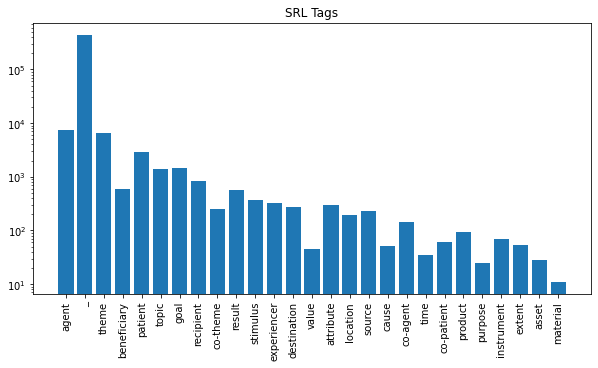

In [ ]:
values = [tags_counter[tag] for tag in tags_counter]

plt.rcParams['figure.figsize'] = [10, 5]#[8, 5]  # Bigger images
plt.bar(tags_counter.keys(), values)
plt.yscale('log')
plt.xticks(rotation='90')
plt.title("SRL Tags")
plt.show()

In [ ]:
SRL_COUNTER = {tag: tags_counter[tag] for tag in tags_counter}
#ic(SRL_COUNTER);

Predicate sense tags

In [ ]:
tags_counter = Counter()
for i, x in enumerate(_train_data['xs']):
  if 'srl_tags' in x.keys():
    for srl_tag in x['srl_tags']:
      tags_counter[srl_tag] += 1
  else:
    print("sample without srl_tag, id={}".format(_train_data['ids'][i]))

In [ ]:
tags_counter = Counter()
for x in _train_data['xs']:
  if not 'predicate_sense' in x.keys():
    continue
  pred_sense = x['predicate_sense']
  tags_counter[pred_sense] += 1

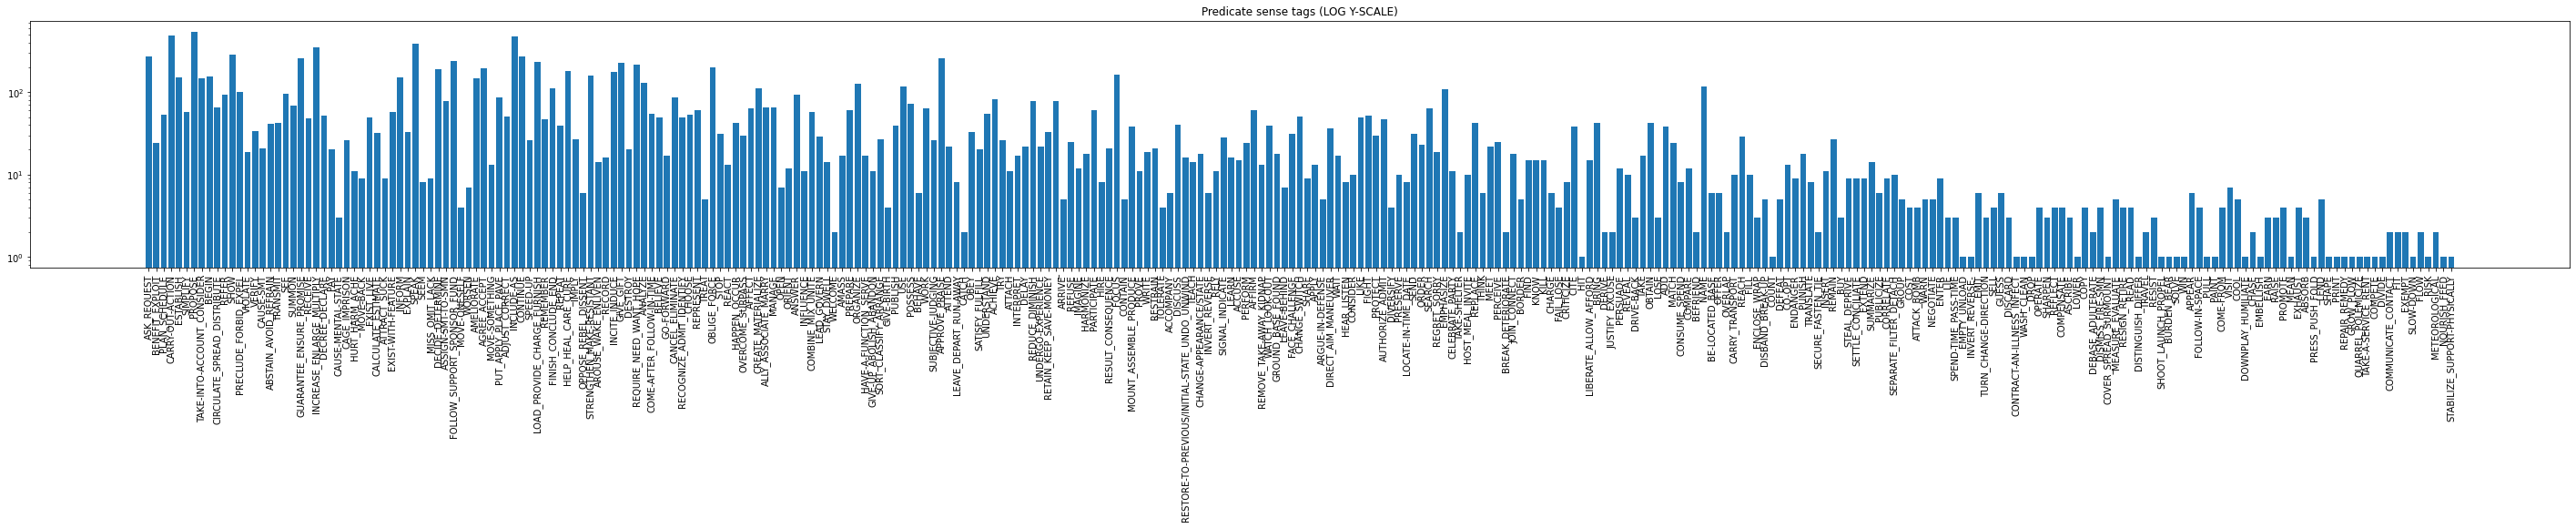

In [ ]:
values = [tags_counter[tag] for tag in tags_counter]

bak = plt.rcParams['figure.figsize']
plt.rcParams['figure.figsize'] = [50, 5]#[8, 5]  # Bigger images
plt.bar(tags_counter.keys(), values)
plt.yscale('log')
plt.xticks(rotation='90')
plt.title("Predicate sense tags (LOG Y-SCALE)")
plt.show()
plt.rcParams['figure.figsize'] = bak

In [ ]:
PRED_SENSE_COUNTER = {tag: tags_counter[tag] for tag in tags_counter}
#ic(PRED_SENSE_COUNTER);

Pos tag stats

In [ ]:
tags_counter = Counter()
for i, x in enumerate(_train_data['xs']):
  #pos_tags = x['pos_tags']
  pos_tags = POS_TAGGER.pos_tagging(x['words'])
  for tag in pos_tags:
    tags_counter[tag] += 1

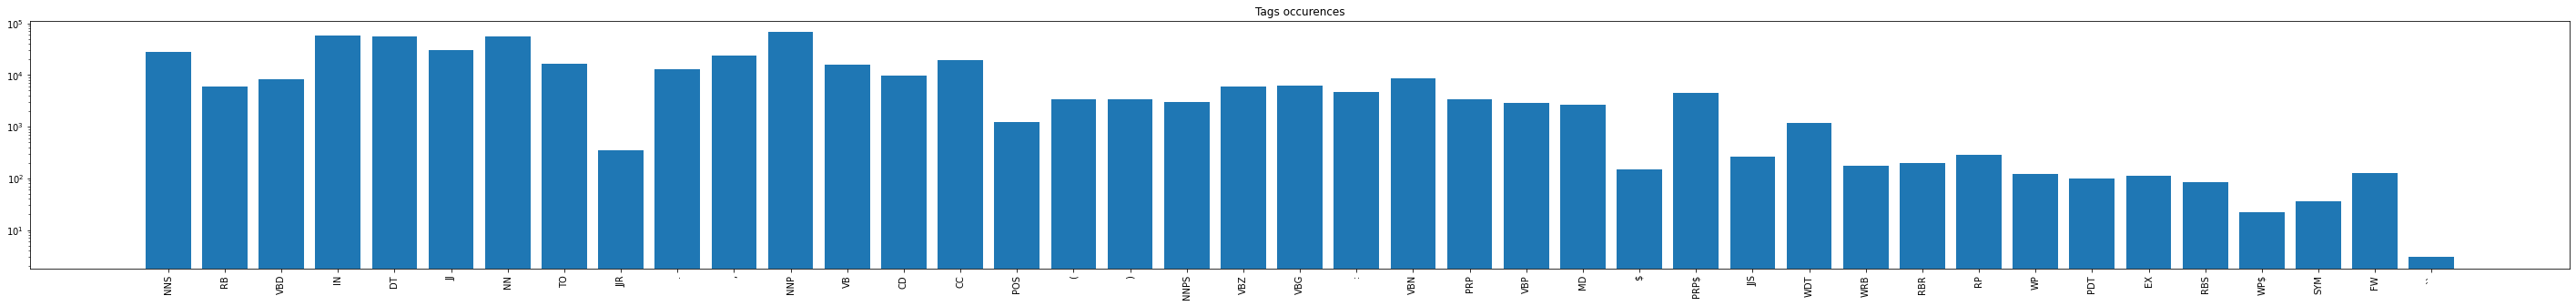

In [ ]:
values = [tags_counter[tag] for tag in tags_counter]

bak = plt.rcParams['figure.figsize']
plt.rcParams['figure.figsize'] = [50, 5]#[8, 5]  # Bigger images
plt.bar(tags_counter.keys(), values)
plt.yscale('log')
plt.xticks(rotation='90')
plt.title("Tags occurences")
plt.show()
plt.rcParams['figure.figsize'] = bak

In [ ]:
POS_TAGS_COUNTER = {tag: tags_counter[tag] for tag in tags_counter}
ic(POS_TAGS_COUNTER);

ic| POS_TAGS_COUNTER: {'$': 148,
                       '(': 3353,
                       ')': 3363,
                       ',': 23806,
                       '.': 12719,
                       ':': 4679,
                       'CC': 19539,
                       'CD': 9632,
                       'DT': 55976,
                       'EX': 113,
                       'FW': 129,
                       'IN': 59204,
                       'JJ': 29827,
                       'JJR': 348,
                       'JJS': 259,
                       'MD': 2620,
                       'NN': 56798,
                       'NNP': 68161,
                       'NNPS': 2945,
                       'NNS': 28459,
                       'PDT': 98,
                       'POS': 1217,
                       'PRP': 3376,
                       'PRP$': 4499,
                       'RB': 6105,
                       'RBR': 201,
                       'RBS': 84,
                       'RP': 288,
               

## BUILD DATASET

Define all the string-int mapper required, the collate_fn for each task and the tokenizer

In [ ]:
# Mapper for Semantic Roles

SRL_MAP = Mapping_string_int(SRL_COUNTER, special_string=None, allow_unknown_tag=True)
#ic(SRL_MAP.list_string);
#ic(len(SRL_MAP.list_string));

In [ ]:
# Mapper for Predicate Sense

PRED_SENSE_MAP = Mapping_string_int(PRED_SENSE_COUNTER, special_string=['_'], allow_unknown_tag=True)
#ic(PRED_SENSE_MAP.list_string);
#ic(len(PRED_SENSE_MAP.list_string));

In [ ]:
# Mapper for POS Tags

POS_TAG_MAP = Mapping_string_int(POS_TAGS_COUNTER, special_string=None, allow_unknown_tag=True, min_freq=100)
#ic(POS_TAG_MAP.list_string);

In [ ]:
# Tokenizer 

TOKENIZER = AutoTokenizer.from_pretrained(GLOBAL_SETTING['LANGUAGE_MODEL_NAME'])

### collate_fn 

#### 2

In [ ]:
collate_fn_2 = partial(collate_fn_args_2, tokenizer=TOKENIZER, 
                                      srl_map=SRL_MAP, 
                                      pred_sense_map=PRED_SENSE_MAP,
                                      pos_tag_map=POS_TAG_MAP)

#### 34

In [ ]:
collate_fn_34 = partial(collate_fn_args_34, tokenizer=TOKENIZER, 
                                      srl_map=SRL_MAP, 
                                      pred_sense_map=PRED_SENSE_MAP,
                                      pos_tag_map=POS_TAG_MAP)

#### 234

In [ ]:
collate_fn_234 = partial(collate_fn_args_234, tokenizer=TOKENIZER, 
                                      srl_map=SRL_MAP, 
                                      pred_sense_map=PRED_SENSE_MAP,
                                      pos_tag_map=POS_TAG_MAP)

### TRAINING SET

Definition training set for each task

#### 2

In [ ]:
train_set_2 = All_in_RAM_Dataset(file_in_path=FILE_TRAIN_EN, 
                                  get_data_func=partial(get_data, load_sample_fn=load_sample_2), 
                                  pre_processing_funcs=[add_pos_tags])
len(train_set_2)

12641

In [ ]:
for sample in train_set_2:
  cpprint(sample)
  break

{'id': '1996/a/50/18_supp__323:5',
 'x': {'pos_tags': ['NNS', 'RB', 'VBD', 'IN', 'DT', 'JJ', 'NNS', 'VBD', 'JJ', 'NN', 'TO', 'JJR',
                    'NN', '.'],
       'predicate_idx': 2,
       'predicate_idx_one_hot': [0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       'predicate_sense': 'ASK_REQUEST',
       'predicate_sense_one_hot': ['_', '_', 'ASK_REQUEST', '_', '_', '_', '_', '_', '_', '_', '_',
                                   '_', '_', '_'],
       'words': ['Members', 'also', 'asked', 'whether', 'all', 'social', 'groups', 'enjoyed',
                 'equal', 'access', 'to', 'higher', 'education', '.']}}


#### 34

In [ ]:
train_set_34 = All_in_RAM_Dataset(file_in_path=FILE_TRAIN_EN, 
                               get_data_func=partial(get_data, load_sample_fn=load_sample_34), 
                               pre_processing_funcs=[add_pos_tags])
len(train_set_34)

12641

In [ ]:
for sample in train_set_34:
  cpprint(sample)
  break

{'id': '1996/a/50/18_supp__323:5',
 'x': {'pos_tags': ['NNS', 'RB', 'VBD', 'IN', 'DT', 'JJ', 'NNS', 'VBD', 'JJ', 'NN', 'TO', 'JJR',
                    'NN', '.'],
       'predicate_idx': 2,
       'predicate_idx_one_hot': [0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       'predicate_sense': 'ASK_REQUEST',
       'predicate_sense_one_hot': ['_', '_', 'ASK_REQUEST', '_', '_', '_', '_', '_', '_', '_', '_',
                                   '_', '_', '_'],
       'srl_tags': ['agent', '_', '_', 'theme', '_', '_', '_', '_', '_', '_', '_', '_', '_', '_'],
       'words': ['Members', 'also', 'asked', 'whether', 'all', 'social', 'groups', 'enjoyed',
                 'equal', 'access', 'to', 'higher', 'education', '.']}}


#### 234

In [ ]:
train_set_234 = All_in_RAM_Dataset(file_in_path=FILE_TRAIN_EN, 
                               get_data_func=partial(get_data, load_sample_fn=load_sample_234), 
                               pre_processing_funcs=[add_pos_tags])
len(train_set_234)

12641

In [ ]:
for sample in train_set_234:
  cpprint(sample)
  break

{'id': '1996/a/50/18_supp__323:5',
 'x': {'pos_tags': ['NNS', 'RB', 'VBD', 'IN', 'DT', 'JJ', 'NNS', 'VBD', 'JJ', 'NN', 'TO', 'JJR',
                    'NN', '.'],
       'predicate_idx': 2,
       'predicate_idx_one_hot': [0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       'srl_tags': ['agent', '_', '_', 'theme', '_', '_', '_', '_', '_', '_', '_', '_', '_', '_'],
       'words': ['Members', 'also', 'asked', 'whether', 'all', 'social', 'groups', 'enjoyed',
                 'equal', 'access', 'to', 'higher', 'education', '.']}}


### VALIDATION SET

Definition validation set for each task

#### 2

In [ ]:
val_set_2 = All_in_RAM_Dataset(file_in_path=FILE_VAL_EN, 
                               get_data_func=partial(get_data, load_sample_fn=load_sample_2), 
                               pre_processing_funcs=[add_pos_tags])
len(val_set_2)

2563

#### 34

In [ ]:
val_set_34 = All_in_RAM_Dataset(file_in_path=FILE_VAL_EN, 
                              get_data_func=partial(get_data, load_sample_fn=load_sample_34), 
                              pre_processing_funcs=[add_pos_tags])
len(val_set_34)

2563

#### 234

In [ ]:
val_set_234 = All_in_RAM_Dataset(file_in_path=FILE_VAL_EN, 
                              get_data_func=partial(get_data, load_sample_fn=load_sample_234), 
                              pre_processing_funcs=[add_pos_tags])
len(val_set_234)

2563

## DATALOADER

Definition dataloader for each task and tests complete pipeline

#### 2

In [ ]:
train_dataloader_2 = DataLoader(train_set_2, 
                              batch_size=GLOBAL_SETTING['BATCH_SIZE_TRAIN'],
                              collate_fn=collate_fn_2,
                              num_workers=GLOBAL_SETTING['COLLANE_FN_NUM_WORKERS'],
                              shuffle=True)

val_dataloader_2 = DataLoader(val_set_2, 
                            batch_size=GLOBAL_SETTING['BATCH_SIZE_VAL'],
                            collate_fn=collate_fn_2,
                            num_workers=GLOBAL_SETTING['COLLANE_FN_NUM_WORKERS'],
                            shuffle=False)

In [ ]:
for sample in val_set_2:
  cpprint(sample)
  break

{'id': '1996/a/50/18_supp__437:1',
 'x': {'pos_tags': ['DT', 'NNP', 'VBZ', 'IN', 'DT', 'NNP', 'NN', 'NN', 'JJR', 'NN', 'TO', 'VBG',
                    'DT', 'NNS', 'IN', 'DT', 'NN', 'NN', 'NNS', ',', 'NN', 'CC', 'VBD', 'NNS', 'IN',
                    'JJ', 'NNS', '.'],
       'predicate_idx': 2,
       'predicate_idx_one_hot': [0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
                                 0, 0, 0, 0, 0, 0],
       'predicate_sense': 'PROPOSE',
       'predicate_sense_one_hot': ['_', '_', 'PROPOSE', '_', '_', '_', '_', '_', '_', '_', '_', '_',
                                   '_', '_', '_', '_', '_', '_', '_', '_', '_', '_', '_', '_', '_',
                                   '_', '_', '_'],
       'words': ['The', 'Committee', 'recommends', 'that', 'the', 'State', 'party', 'pay', 'more',
                 'attention', 'to', 'sensitizing', 'the', 'members', 'of', 'the', 'law',
                 'enforcement', 'agencies', ',', 'security', 'and', 'arme

In [ ]:
for batch in val_dataloader_2:
  break

ic(batch.keys());

sample = dict()
for key in batch.keys():
  sample[key] = batch[key][0]
ic(sample);

ic| batch.keys(): dict_keys(['input_ids', 'attention_mask', 'word_ids', 'predicate_idx', 'predicate_idx_one_hot', 'predicate_idx_one_hot_alligned', 'predicate_sense', 'predicate_sense_one_hot', 'pos_ids'])
ic| sample: {'attention_mask': tensor([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
                    1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
                    0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
                    0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
                    0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
                    0, 0, 0, 0, 0]),
             'input_ids': tensor([  101,  1996,  2837, 26021,  2008,  1996,  2110,  2283,  3477,  2062,
                     3086,  2000, 12411, 28032,  6026,  1996,  2372,  1997,  1996,  2375,
                     7285,  6736,  1010,  3036,  1998,  4273,  2749,  2055,  2529,  

#### 34

In [ ]:
train_dataloader_34 = DataLoader(train_set_34, 
                              batch_size=GLOBAL_SETTING['BATCH_SIZE_TRAIN'],
                              collate_fn=collate_fn_34,
                              num_workers=GLOBAL_SETTING['COLLANE_FN_NUM_WORKERS'],
                              shuffle=True)

val_dataloader_34 = DataLoader(val_set_34, 
                            batch_size=GLOBAL_SETTING['BATCH_SIZE_VAL'],
                            collate_fn=collate_fn_34,
                            num_workers=GLOBAL_SETTING['COLLANE_FN_NUM_WORKERS'],
                            shuffle=False)

In [ ]:
for sample in val_set_34:
  cpprint(sample)
  break

{'id': '1996/a/50/18_supp__437:1',
 'x': {'pos_tags': ['DT', 'NNP', 'VBZ', 'IN', 'DT', 'NNP', 'NN', 'NN', 'JJR', 'NN', 'TO', 'VBG',
                    'DT', 'NNS', 'IN', 'DT', 'NN', 'NN', 'NNS', ',', 'NN', 'CC', 'VBD', 'NNS', 'IN',
                    'JJ', 'NNS', '.'],
       'predicate_idx': 2,
       'predicate_idx_one_hot': [0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
                                 0, 0, 0, 0, 0, 0],
       'predicate_sense': 'PROPOSE',
       'predicate_sense_one_hot': ['_', '_', 'PROPOSE', '_', '_', '_', '_', '_', '_', '_', '_', '_',
                                   '_', '_', '_', '_', '_', '_', '_', '_', '_', '_', '_', '_', '_',
                                   '_', '_', '_'],
       'srl_tags': ['_', 'agent', '_', 'topic', '_', '_', '_', '_', '_', '_', '_', '_', '_', '_',
                    '_', '_', '_', '_', '_', '_', '_', '_', '_', '_', '_', '_', '_', '_'],
       'words': ['The', 'Committee', 'recommends', 'that', 'the', 'State

In [ ]:
for batch in val_dataloader_34:
  break

ic(batch.keys());

sample = dict()
for key in batch.keys():
  sample[key] = batch[key][0]
ic(sample);

ic| batch.keys(): dict_keys(['input_ids', 'attention_mask', 'word_ids', 'predicate_idx', 'predicate_sense', 'predicate_sense_one_hot', 'srl_ids', 'pos_ids'])
ic| sample: {'attention_mask': tensor([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
                    1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
                    0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
                    0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
                    0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
                    0, 0, 0, 0, 0]),
             'input_ids': tensor([  101,  1996,  2837, 26021,  2008,  1996,  2110,  2283,  3477,  2062,
                     3086,  2000, 12411, 28032,  6026,  1996,  2372,  1997,  1996,  2375,
                     7285,  6736,  1010,  3036,  1998,  4273,  2749,  2055,  2529,  2916,
                     1012,   102, 26021,  

#### 234

In [ ]:
train_dataloader_234 = DataLoader(train_set_234, 
                              batch_size=GLOBAL_SETTING['BATCH_SIZE_TRAIN'],
                              collate_fn=collate_fn_234,
                              num_workers=GLOBAL_SETTING['COLLANE_FN_NUM_WORKERS'],
                              shuffle=True)

val_dataloader_234 = DataLoader(val_set_234, 
                            batch_size=GLOBAL_SETTING['BATCH_SIZE_VAL'],
                            collate_fn=collate_fn_234,
                            num_workers=GLOBAL_SETTING['COLLANE_FN_NUM_WORKERS'],
                            shuffle=False)

In [ ]:
for sample in val_set_234:
  cpprint(sample)
  break

{'id': '1996/a/50/18_supp__437:1',
 'x': {'pos_tags': ['DT', 'NNP', 'VBZ', 'IN', 'DT', 'NNP', 'NN', 'NN', 'JJR', 'NN', 'TO', 'VBG',
                    'DT', 'NNS', 'IN', 'DT', 'NN', 'NN', 'NNS', ',', 'NN', 'CC', 'VBD', 'NNS', 'IN',
                    'JJ', 'NNS', '.'],
       'predicate_idx': 2,
       'predicate_idx_one_hot': [0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
                                 0, 0, 0, 0, 0, 0],
       'srl_tags': ['_', 'agent', '_', 'topic', '_', '_', '_', '_', '_', '_', '_', '_', '_', '_',
                    '_', '_', '_', '_', '_', '_', '_', '_', '_', '_', '_', '_', '_', '_'],
       'words': ['The', 'Committee', 'recommends', 'that', 'the', 'State', 'party', 'pay', 'more',
                 'attention', 'to', 'sensitizing', 'the', 'members', 'of', 'the', 'law',
                 'enforcement', 'agencies', ',', 'security', 'and', 'armed', 'forces', 'about',
                 'human', 'rights', '.']}}


In [ ]:
for batch in val_dataloader_234:
  break

ic(batch.keys());

sample = dict()
for key in batch.keys():
  sample[key] = batch[key][0]
ic(sample);

ic| batch.keys(): dict_keys(['input_ids', 'attention_mask', 'word_ids', 'predicate_idx', 'pos_ids', 'predicate_idx_one_hot', 'predicate_idx_one_hot_alligned', 'srl_ids'])
ic| sample: {'attention_mask': tensor([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
                    1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
                    0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
                    0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
                    0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
                    0, 0, 0, 0, 0]),
             'input_ids': tensor([  101,  1996,  2837, 26021,  2008,  1996,  2110,  2283,  3477,  2062,
                     3086,  2000, 12411, 28032,  6026,  1996,  2372,  1997,  1996,  2375,
                     7285,  6736,  1010,  3036,  1998,  4273,  2749,  2055,  2529,  2916,
                     1012,   

# MODEL

In [ ]:
def printable_hparams(params, attrs_print_only_bin_value=[]):
  """
    Function used to print hyperparameters of a model
  """
  res = {}
  for key in params.keys():
    if key in attrs_print_only_bin_value:
      res[key] = 'Not_None' if not params[key] is None else 'Is_None'
    else:
      res[key] = params[key]
  return res

def object_to_dict(obj, attrs_print_only_bin_value=[]):
  """
    Function used to represent an object as a printable dictionary
  """
  attr = [elem for elem in dir(obj) if elem[0] != '_']
  res = {}
  for elem in attr:
    if elem in attrs_print_only_bin_value:
      res[elem] = 'Not_None' if not getattr(obj, elem) is None else 'Is_None'
    else:
      res[elem] = getattr(obj, elem)
  return res

### MODELS TESTS

In [ ]:
HPARAMS = {
    'epochs':                     5,

    'language_model_name':        GLOBAL_SETTING['LANGUAGE_MODEL_NAME'],
    'fine_tune_lm':               False,
    'transformer_learning_rate':  1e-5,
    'transformer_weight_decay':   0.0,

    'learning_rate':              2e-4,
    'weight_decay':               0.0,

    'device':                     GLOBAL_SETTING['DEVICE'],
    'num_labels':                 len(SRL_MAP),

    'positional_embedding_dim':   40,
    'lstm_hidden_dim':            300,
    'lstm_num_layers':            1,
    'lstm_dropout':               0.2,
    'classifier_dense_units':     300,

    'att_short_print':            [],
}

printable_hparams(HPARAMS, attrs_print_only_bin_value=HPARAMS['att_short_print'])

{'epochs': 5,
 'language_model_name': 'distilbert-base-uncased',
 'fine_tune_lm': False,
 'transformer_learning_rate': 1e-05,
 'transformer_weight_decay': 0.0,
 'learning_rate': 0.0002,
 'weight_decay': 0.0,
 'device': 'cuda',
 'num_labels': 28,
 'positional_embedding_dim': 40,
 'lstm_hidden_dim': 300,
 'lstm_num_layers': 1,
 'lstm_dropout': 0.2,
 'classifier_dense_units': 300,
 'att_short_print': []}

#### 2

In [ ]:
HPARAMS.update({
    'num_labels':                 len(PRED_SENSE_MAP),
})
printable_hparams(HPARAMS, attrs_print_only_bin_value=HPARAMS['att_short_print'])

{'epochs': 5,
 'language_model_name': 'distilbert-base-uncased',
 'fine_tune_lm': False,
 'transformer_learning_rate': 1e-05,
 'transformer_weight_decay': 0.0,
 'learning_rate': 0.0002,
 'weight_decay': 0.0,
 'device': 'cuda',
 'num_labels': 305,
 'positional_embedding_dim': 40,
 'lstm_hidden_dim': 300,
 'lstm_num_layers': 1,
 'lstm_dropout': 0.2,
 'classifier_dense_units': 300,
 'att_short_print': []}

In [ ]:
# model test

srl_model_2 = SRL_Model_2(**HPARAMS)

# get a batch
for batch in train_dataloader_2:
  break

ic(batch.keys());

out = srl_model_2(**batch, compute_predictions=True, compute_loss=True, labels=batch['predicate_sense_one_hot'])
logits = out['logits']
ic(logits.size());
preds = out['predictions']
ic(preds.size());
loss = out['loss']
ic(loss);

Some weights of the model checkpoint at distilbert-base-uncased were not used when initializing DistilBertModel: ['vocab_layer_norm.bias', 'vocab_layer_norm.weight', 'vocab_projector.weight', 'vocab_projector.bias', 'vocab_transform.bias', 'vocab_transform.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
ic| batch.keys(): dict_keys(['input_ids', 'attention_mask', 'word_ids', 'predicate_idx', 'predicate_idx_one_hot', 'predicate_idx_one_hot_alligned', 'predicate_sense', 'predicate_sense_one_hot', 'pos_ids'])
ic| logits.size(): torch.Size([32, 93, 305])
ic| preds.size(): 

#### 34

In [ ]:
HPARAMS.update({
    'num_labels':                 len(SRL_MAP),
})
printable_hparams(HPARAMS, attrs_print_only_bin_value=HPARAMS['att_short_print'])

{'epochs': 5,
 'language_model_name': 'distilbert-base-uncased',
 'fine_tune_lm': False,
 'transformer_learning_rate': 1e-05,
 'transformer_weight_decay': 0.0,
 'learning_rate': 0.0002,
 'weight_decay': 0.0,
 'device': 'cuda',
 'num_labels': 28,
 'positional_embedding_dim': 40,
 'lstm_hidden_dim': 300,
 'lstm_num_layers': 1,
 'lstm_dropout': 0.2,
 'classifier_dense_units': 300,
 'att_short_print': []}

In [ ]:
# model test

srl_model_34 = SRL_Model_34(**HPARAMS)

# get a batch
for batch in train_dataloader_34:
  break

ic(batch.keys());

out = srl_model_34(**batch, compute_predictions=True, compute_loss=True, labels=batch['srl_ids'])
logits = out['logits']
ic(logits.size());
preds = out['predictions']
ic(preds.size());
loss = out['loss']
ic(loss);

Some weights of the model checkpoint at distilbert-base-uncased were not used when initializing DistilBertModel: ['vocab_layer_norm.bias', 'vocab_layer_norm.weight', 'vocab_projector.weight', 'vocab_projector.bias', 'vocab_transform.bias', 'vocab_transform.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
ic| batch.keys(): dict_keys(['input_ids', 'attention_mask', 'word_ids', 'predicate_idx', 'predicate_sense', 'predicate_sense_one_hot', 'srl_ids', 'pos_ids'])
ic| logits.size(): torch.Size([32, 96, 28])
ic| preds.size(): torch.Size([32, 96])
ic| loss: tensor(3.3571, gra

#### 234

This model is built combining a SRL_Model2 and a SRL_Model_34

In [ ]:
HPARAMS = {
    'epochs':                     5,
    'att_short_print':            [],
    'device':                     GLOBAL_SETTING['DEVICE'],

    'null_tag_sense_idx':         PRED_SENSE_MAP.stoi('_'),

    'hparams_SRL_2':  {
      'language_model_name':        GLOBAL_SETTING['LANGUAGE_MODEL_NAME'],
      'fine_tune_lm':               False,
      'transformer_learning_rate':  1e-5,
      'transformer_weight_decay':   0.0,

      'learning_rate':              2e-4,
      'weight_decay':               0.0,

      'num_labels':                 len(PRED_SENSE_MAP),

      'positional_embedding_dim':   40,
      'lstm_hidden_dim':            300,
      'lstm_num_layers':            1,
      'lstm_dropout':               0.2,
      'classifier_dense_units':     300,
    },

    'hparams_SRL_34':  {
      'language_model_name':        GLOBAL_SETTING['LANGUAGE_MODEL_NAME'],
      'fine_tune_lm':               False,
      'transformer_learning_rate':  1e-5,
      'transformer_weight_decay':   0.0,

      'learning_rate':              2e-4,
      'weight_decay':               0.0,

      'num_labels':                 len(SRL_MAP),

      'positional_embedding_dim':   40,
      'lstm_hidden_dim':            300,
      'lstm_num_layers':            1,
      'lstm_dropout':               0.2,
      'classifier_dense_units':     300,
    },
}

printable_hparams(HPARAMS, attrs_print_only_bin_value=HPARAMS['att_short_print'])

{'epochs': 5,
 'att_short_print': [],
 'device': 'cuda',
 'null_tag_sense_idx': 36,
 'hparams_SRL_2': {'language_model_name': 'distilbert-base-uncased',
  'fine_tune_lm': False,
  'transformer_learning_rate': 1e-05,
  'transformer_weight_decay': 0.0,
  'learning_rate': 0.0002,
  'weight_decay': 0.0,
  'num_labels': 305,
  'positional_embedding_dim': 40,
  'lstm_hidden_dim': 300,
  'lstm_num_layers': 1,
  'lstm_dropout': 0.2,
  'classifier_dense_units': 300},
 'hparams_SRL_34': {'language_model_name': 'distilbert-base-uncased',
  'fine_tune_lm': False,
  'transformer_learning_rate': 1e-05,
  'transformer_weight_decay': 0.0,
  'learning_rate': 0.0002,
  'weight_decay': 0.0,
  'num_labels': 28,
  'positional_embedding_dim': 40,
  'lstm_hidden_dim': 300,
  'lstm_num_layers': 1,
  'lstm_dropout': 0.2,
  'classifier_dense_units': 300}}

In [ ]:
# model test

srl_model_234 = SRL_Model_234(**HPARAMS)

# get a batch
for batch in val_dataloader_234:
  pass

ic(batch.keys());

out = srl_model_234(**batch, compute_predictions=True, compute_loss=True, labels=batch['srl_ids'])
logits = out['logits']
ic(logits.size());
preds = out['predictions']
ic(preds.size());
loss = out['loss']
ic(loss);

Some weights of the model checkpoint at distilbert-base-uncased were not used when initializing DistilBertModel: ['vocab_layer_norm.bias', 'vocab_layer_norm.weight', 'vocab_projector.weight', 'vocab_projector.bias', 'vocab_transform.bias', 'vocab_transform.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of the model checkpoint at distilbert-base-uncased were not used when initializing DistilBertModel: ['vocab_layer_norm.bias', 'vocab_layer_norm.weight', 'vocab_projector.weight', 'vocab_projector.bias', 'vocab_transform.bias', 'vocab_transform.weight']
- T

# END-TO-END PREDICTION

Perform a prediction end-to-end namely `List[str]` -> `List[str]`

#### 2

In [ ]:
def end_to_end_pred_2(model):
  """
    Perform end-to-end predictions on validation set - Task 2
  """
  end_to_end_predictor_SRL_2 = End_to_end_predictor_SRL_2(model=model,
                                                            pred_sense_map=PRED_SENSE_MAP,
                                                            device=GLOBAL_SETTING['DEVICE'],
                                                            load_sample_fn=load_sample_2,
                                                            collate_fn=collate_fn_2,
                                                            pre_processing_funcs=[add_pos_tags])

  sentences, labels = utils.read_dataset(FILE_VAL_EN)

  preds = dict()
  for key in sentences.keys():
    sentence = sentences[key]
    #
    pred = end_to_end_predictor_SRL_2.predict(sentence, force_only_one=True)  
    preds[key] = {
        'predicates' :pred
    }

  return {
      'predictions': preds,
      'labels': labels
  }

def eval_2(model):
  """
    Evaluation model on validation set - Task 2"
  """
  res = end_to_end_pred_2(model)
  predictions = res['predictions']
  labels = res['labels']

  try:
    ic(utils.evaluate_predicate_disambiguation(labels, predictions))
  except:
    print("Too bad! Not evaluable")


In [ ]:
eval_2(srl_model_2)

ic| utils.evaluate_predicate_disambiguation(labels, predictions): {'f1': 0.0006332119677061895,
                                                                   'false_negatives': 2551,
                                                                   'false_positives': 3762,
                                                                   'precision': 0.0005313496280552603,
                                                                   'recall': 0.0007833920877399138,
                                                                   'true_positives': 2}


#### 34

In [ ]:
def end_to_end_pred_34(model):  
  """
    Perform end-to-end predictions on validation set - Task 34
  """
  end_to_end_predictor_SRL_34 = End_to_end_predictor_SRL_34(model=model,
                                                            srl_map=SRL_MAP,
                                                            pred_sense_map=PRED_SENSE_MAP,
                                                            device=GLOBAL_SETTING['DEVICE'],
                                                            load_sample_fn=load_sample_34,
                                                            collate_fn=collate_fn_34,
                                                            pre_processing_funcs=[add_pos_tags])

  sentences, labels = utils.read_dataset(FILE_VAL_EN)

  preds = dict()
  for key in sentences.keys():
    sentence = sentences[key]
    #
    pred = end_to_end_predictor_SRL_34.predict(sentence)  
    preds[key] = pred

  return {
      'predictions': preds,
      'labels': labels
  }

def eval_34(model):
  """
    Evaluation model on validation set - Task 34"
  """

  res = end_to_end_pred_34(model)
  predictions = res['predictions']
  labels = res['labels']

  try:
    ic(utils.evaluate_argument_classification(labels, predictions))
  except:
    print("Too bad! Not evaluable")


  try:
    ic(utils.evaluate_argument_identification(labels, predictions))
  except:
    print("Too bad! Not evaluable")

In [ ]:
eval_34(srl_model_34)

ic| utils.evaluate_argument_classification(labels, predictions): {'f1': 0.0026892411416018034,
                                                                  'false_negatives': 4871,
                                                                  'false_positives': 100451,
                                                                  'precision': 0.0014116290397940216,
                                                                  'recall': 0.028326351486136048,
                                                                  'true_positives': 142}
ic| utils.evaluate_argument_identification(labels, predictions): {'f1': 0.09488097267200728,
                                                                  'false_negatives': 3,
                                                                  'false_positives': 95583,
                                                                  'precision': 0.04980465837583132,
                                                           

#### 234

In [ ]:
def end_to_end_pred_234(model):  
  """
    Perform end-to-end predictions on validation set - Task 234
  """
  end_to_end_predictor_SRL_234 = End_to_end_predictor_SRL_234(model=model,
                                                            srl_map=SRL_MAP,
                                                            pred_sense_map=PRED_SENSE_MAP,
                                                            device=GLOBAL_SETTING['DEVICE'],
                                                            load_sample_fn=load_sample_234,
                                                            collate_fn=collate_fn_234,
                                                            pre_processing_funcs=[add_pos_tags])

  sentences, labels = utils.read_dataset(FILE_VAL_EN)

  preds = dict()
  for key in sentences.keys():
    sentence = sentences[key]
    #
    pred = end_to_end_predictor_SRL_234.predict(sentence)  
    preds[key] = pred

  return {
      'predictions': preds,
      'labels': labels
  }

def eval_234(model):
  """
    Evaluation model on validation set - Task 234"
  """
  res = end_to_end_pred_234(model)
  predictions = res['predictions']
  labels = res['labels']

  try:
    ic(utils.evaluate_argument_classification(labels, predictions))
  except:
    print("Too bad! Not evaluable")


  try:
    ic(utils.evaluate_argument_identification(labels, predictions))
  except:
    print("Too bad! Not evaluable")

In [ ]:
eval_234(srl_model_234)

ic| utils.evaluate_argument_classification(labels, predictions): {'f1': 0.017585038520509567,
                                                                  'false_negatives': 4084,
                                                                  'false_positives': 99716,
                                                                  'precision': 0.00923046351035819,
                                                                  'recall': 0.1853181727508478,
                                                                  'true_positives': 929}
ic| utils.evaluate_argument_identification(labels, predictions): {'f1': 0.09489106362036004,
                                                                  'false_negatives': 0,
                                                                  'false_positives': 95632,
                                                                  'precision': 0.049808733667842414,
                                                                

# TRAINER

In [ ]:
class Trainer():
    """
      Object used to train a generic PyTorch model

      # Parameters init
          `model`: `torch.nn.Module`, required
            PyTorch model

          `optimizer`: `torch.nn.Module`, required
            PyTorch optimizer

          `device`: `str`, required
            Name of the device to ue

          `train_dataloader`: `DataLoader`, required
            Dataloader for training set

          `val_dataloader`: `DataLoader`, required
            Dataloader for validation set

          `forward_fn`: `Callable`, required
            Function to give the batch in input to the model  

          `output_folder_root`: `str`, Optional (default=None)
            Folder in which create the output folder `training_id`

          `training_id`: `str`, Optional (default=None)
            Name of the folder to create and use as output folder
    """
    def __init__(self, 
                 model: torch.nn.Module, 
                 optimizer, 
                 device: str, 
                 train_dataloader: DataLoader, 
                 val_dataloader: DataLoader, 
                 forward_fn: Callable,
                 output_folder_root: Optional[str]=None, 
                 training_id: Optional[str]=None,
                 optuna=None,  
                 metrics_names: Optional[List[str]]=[],
                 raw_evaluator=None,
                 metric_to_observe_name='', 
                 metric_to_observe_min_or_max='max',
                 ignore_first_epoch=False):

        self.device = device
        self.model = model
        self.optimizer = optimizer

        self.ignore_first_epoch = ignore_first_epoch

        self.model.to(self.device)  
        self.forward_fn = forward_fn
        self.history = {
                          'epoch': list(), 
                          'loss_train': list(), 'loss_val': list(), 
                        }
        # add additional metrics
        self.raw_eval = raw_evaluator
        self.metrics_names = metrics_names
        metrics = dict()
        for name in self.metrics_names:
          metrics[name + '_train'] = list()
          metrics[name + '_val'] = list()

        self.metric_to_observe_name = metric_to_observe_name
        self.metric_to_observe_min_or_max = metric_to_observe_min_or_max

        self.history.update(metrics)

        self.train_dataloader = train_dataloader
        self.val_dataloader = val_dataloader

        self.output_folder_root = output_folder_root
        self.output_folder = None

        self.optuna = optuna
        self.training_id = training_id

        if self.output_folder_root: 
          if self.training_id:
            self.output_folder = os.path.join(self.output_folder_root, self.training_id, 'weights')
          else:
            self.output_folder = os.path.join(self.output_folder_root, 'weights')
          #
          if not os.path.isdir(self.output_folder):
            os.makedirs(self.output_folder)
          else:
            text = "WARNING!!! Output folder already exists!" 
            text = colored(text, "yellow")
            print(text, flush=True)


    def train(self, epochs=1):
        for epoch in range(epochs):
            self.history['epoch'].append(epoch)
            
            # train
            train_epoch_res = self._train_epoch()
            ###
            avg_train_loss = train_epoch_res['loss']
            self.history['loss_train'].append(avg_train_loss)
            #
            for metric in self.metrics_names:
              self.history[metric + '_train'].append(train_epoch_res[metric])

            # validation
            val_epoch_res = self._val_epoch()
            ###
            avg_val_loss = val_epoch_res['loss']
            self.history['loss_val'].append(avg_val_loss)
            #
            for metric in self.metrics_names:
              self.history[metric + '_val'].append(val_epoch_res[metric])
            
            to_print = ''
            text = 'Epoch: {}'.format(str(epoch).zfill(3))
            to_print += colored(text, 'white', attrs=['bold'])
            to_print += ' - '
            text = 'loss_train = {:0.4f}'.format(self.history['loss_train'][-1])
            if self.history['loss_train'][-1] > self.history['loss_val'][-1]:
              colored_attrs = ['bold']
            else:
              colored_attrs = []
            if len(self.history['loss_train']) > 1 and self.history['loss_train'][-1] > self.history['loss_train'][-2]:
              to_print += colored(text, 'red', attrs=colored_attrs)
            else:
              to_print += colored(text, 'green', attrs=colored_attrs)

            to_print += ', '
            text = 'loss_val = {:0.4f}'.format(self.history['loss_val'][-1])
            if len(self.history['loss_val']) > 1 and self.history['loss_val'][-1] > self.history['loss_val'][-2]:
              to_print += colored(text, 'red', attrs=colored_attrs)
            else:
              to_print += colored(text, 'green', attrs=colored_attrs)

            for i, key in enumerate(self.history.keys()):
              if key in ['epoch', 'loss_train', 'loss_val']:
                continue
              to_print += ' - {} = {:0.4f}'.format(key, self.history[key][-1])  
            print(to_print, flush=True)
            
            if self.output_folder:
              self._manage_save_model(epoch, self.metric_to_observe_name +'_val', self.metric_to_observe_min_or_max)
            '''
            if not self.optuna is None:
              stats = {
                  'epoch': epoch,
                  'avg_val_f1_score': avg_val_f1_score
                  #'avg_val_loss' : avg_val_loss
              }
              self._optuna_handler(stats)
            '''
        return 0


    def _manage_save_model(self, epoch, metric, min_max, keep_only_one=True):
      if len(self.history[metric]) == 1:
        self._save_model(epoch, metric, self.history[metric][0], keep_only_one=keep_only_one)
        return 

      if len(self.history[metric]) == 2 and self.ignore_first_epoch:
        self._save_model(epoch, metric, self.history[metric][0], keep_only_one=keep_only_one)
        return 

      if self.ignore_first_epoch: 
        # ignore performance in the first epoch
        start_idx = 1
      else:
        start_idx = 0
      
      if min_max == 'min':
        best = min(self.history[metric][start_idx:-1])
        if self.history[metric][-1] < best:
          self._save_model(epoch, metric, self.history[metric][-1], keep_only_one=keep_only_one)
      elif min_max == 'max':
        best = max(self.history[metric][start_idx:-1])
        if self.history[metric][-1] > best:
          self._save_model(epoch, metric, self.history[metric][-1], keep_only_one=keep_only_one)
      else:
        print("unable to save model, unknown metric selected")

    def _val_epoch(self):
      if GLOBAL_SETTING['SHOW_EXEC_TIME']:
        exec_time_eval = 0.0
      #
      res = {}
      val_loss = 0.0
      len_val = 0

      if self.raw_eval:
        self.raw_eval.reset()

      self.model.eval() #evaluation mode
      with torch.no_grad(): # avoid gradient computation (avoid waste of time)
        for batch in self.val_dataloader:#tqdm(self.val_dataloader, desc="Validation", leave=False):
          #
          '''
          batch = {k: v.to(self.device) for k, v in batch.items()}
          labels = batch['predicate_sense_one_hot']
          batch_out = self.model(**batch, compute_predictions=True, compute_loss=True, labels=labels)
          '''
          batch_out = self.forward_fn(batch=batch, model=self.model, device=self.device)
          #ic(batch_out)

          logits = batch_out['logits']
          preds = batch_out['predictions']
          loss = batch_out['loss']
          labels = batch_out['labels']
          #
          val_loss += loss.item()
          len_val += 1
          #
          if GLOBAL_SETTING['SHOW_EXEC_TIME']:
            start = time.time()

          if self.raw_eval:
            self.raw_eval.update(labels=labels, predictions=preds)

          if GLOBAL_SETTING['SHOW_EXEC_TIME']:
            exec_time_eval += time.time() - start
      #
      if GLOBAL_SETTING['SHOW_EXEC_TIME']:
        name_func = 'eval in validation'
        text = '{}: Exec time = {:0.4f}s'.format(name_func, exec_time_eval) 
        print(colored(text, 'yellow'), flush=True)
      #
      res['loss'] = val_loss/len_val
      #
      if self.raw_eval:
        res_raw_eval = self.raw_eval.evaluate_and_reset()
        for metric in self.metrics_names:
          res[metric] = res_raw_eval[metric]
      return res

    def _train_epoch(self):
      if GLOBAL_SETTING['SHOW_EXEC_TIME']:
        exec_time_eval = 0.0
      #
      res = {}
      epoch_loss = 0.0
      len_train = 0

      if self.raw_eval:
        self.raw_eval.reset()

      self.model.train()  # we are using this model for training 
                          # (some layers have different behaviours 
                          # in train and eval mode)

      for batch in self.train_dataloader: #tqdm(self.train_dataloader, desc="Training", leave=False):
          #
          self.optimizer.zero_grad()
          #
          '''
          batch = {k: v.to(self.device) for k, v in batch.items()}
          labels = batch['predicate_sense_one_hot']
          batch_out = self.model(**batch, compute_predictions=True, compute_loss=True, labels=labels)
          '''
          batch_out = self.forward_fn(batch=batch, model=self.model, device=self.device)
          #ic(batch.keys())
          #ic(batch_out.keys())
          #
          logits = batch_out['logits']
          preds = batch_out['predictions']
          loss = batch_out['loss']
          labels = batch_out['labels']
          #
          # computes the gradient of the loss
          loss.backward()
          #
          # updates parameters based on the gradient information
          self.optimizer.step()
          #
          epoch_loss += loss.item()
          len_train += 1
          #
          if GLOBAL_SETTING['SHOW_EXEC_TIME']:
            start = time.time()

          if self.raw_eval:
            self.raw_eval.update(labels=labels, predictions=preds)

          if GLOBAL_SETTING['SHOW_EXEC_TIME']:
            exec_time_eval += time.time() - start
      
      if GLOBAL_SETTING['SHOW_EXEC_TIME']:
        name_func = 'eval in training'
        text = '{}: Exec time = {:0.4f}s'.format(name_func, exec_time_eval)
        print(colored(text, 'yellow'), flush=True)
 
      res['loss'] = epoch_loss/len_train

      if self.raw_eval:
        res_raw_eval = self.raw_eval.evaluate_and_reset()
        for metric in self.metrics_names:
          res[metric] = res_raw_eval[metric]
      return res

    def _save_model(self, epoch, metric_name, metric_value, keep_only_one):
      if keep_only_one:
        for f in os.listdir(self.output_folder):
          if '.pt' in f:
            os.remove(os.path.join(self.output_folder, f))
      filename = os.path.join(self.output_folder, '{}-{}={:0.4f}_.pt'.format(str(epoch).zfill(4), str(metric_name), metric_value))
      #torch.save(self.model.state_dict(), filename)  # save the model state
      self.model.save_model(filename)
      text = f"model saved in {filename}"
      print(colored(text, "cyan"))
      return None

    def _optuna_handler(self, stats):
      if self.optuna['pruning'] == True:

        # Add prune mechanism
        self.optuna['trial'].report(stats['avg_val_loss'], stats['epoch'])

        if self.optuna['trial'].should_prune():
            raise optuna.exceptions.TrialPruned()
      return None


    def _plot_metric(self, metric_name, folder_out=None):
      # training
      history = self.history[metric_name + '_train']
      x = range(len(history))
      y = history
      plt.plot(x, y, label='Training ' + metric_name)
      
      # validation
      history = self.history[metric_name + '_val']
      x = range(len(history))
      y = history
      plt.plot(x, y, label='Validation ' + metric_name)

      plt.title('Training and Validation ' + metric_name)
      plt.xlabel('Epochs')
      plt.ylabel(metric_name)
      plt.legend()

      if folder_out:
        name = metric_name + '.svg'
        filepath = os.path.join(folder_out, name)
        plt.savefig(filepath)
        plt.close()
      else:
        plt.show()

    def plot_metrics(self, folder_out=None):
      self._plot_metric('loss', folder_out=folder_out)
      for metric in self.metrics_names:
        self._plot_metric(metric, folder_out=folder_out)

# TRAINING AND PREDICTION

Section used to test a model and its hyperparameters

#### 2

In [ ]:
stop here

SyntaxError: ignored

In [ ]:
ID_TRAINING = datetime.date.today().strftime("%y%m%d") + '_' + datetime.datetime.now().strftime("%H%M%S") + '_T2_'
ID_TRAINING += 'test_final_srl_2_lm_trainable'

ID_TRAINING

In [ ]:
HPARAMS = {
    'epochs':                     5,

    'language_model_name':        GLOBAL_SETTING['LANGUAGE_MODEL_NAME'],
    'fine_tune_lm':               False,
    'transformer_learning_rate':  1e-5,
    'transformer_weight_decay':   0.0,

    'learning_rate':              2e-4,
    'weight_decay':               0.0,

    'device':                     GLOBAL_SETTING['DEVICE'],

    'lstm_hidden_dim':            300,
    'lstm_num_layers':            1,
    'lstm_dropout':               0.2,
    'classifier_dense_units':     300,

    'att_short_print':            [],
}

printable_hparams(HPARAMS, attrs_print_only_bin_value=HPARAMS['att_short_print'])

In [ ]:
HPARAMS.update({
    'num_labels':                 len(PRED_SENSE_MAP),
    'epochs':             20,
        'fine_tune_lm': True,
})
printable_hparams(HPARAMS, attrs_print_only_bin_value=HPARAMS['att_short_print'])

In [ ]:
dir_out = os.path.join(DIR_OUTPUT, ID_TRAINING)
os.makedirs(dir_out)

In [ ]:
path = os.path.join(DIR_OUTPUT, ID_TRAINING, "hparams.json")
save_as_json(path, HPARAMS)

In [ ]:
path = os.path.join(DIR_OUTPUT, ID_TRAINING, "global_setting.json")
save_as_json(path, GLOBAL_SETTING)

In [ ]:
set_random_seed()

In [ ]:
srl_model_2 = SRL_Model_2(**HPARAMS)

Before training

In [ ]:
eval_2(srl_model_2)

Training

In [ ]:
model = srl_model_2
# optimizer


groups = [
  {
    "params": model.lstm.parameters(),
    "lr": HPARAMS['learning_rate'],
    "weight_decay": HPARAMS['weight_decay'],
  },
  {
    "params": model.classifier.parameters(),
    "lr": HPARAMS['learning_rate'],
    "weight_decay": HPARAMS['weight_decay'],
  },
  {
    "params": model.transformer_model.parameters(),
    "lr": HPARAMS['transformer_learning_rate'],
    "weight_decay": HPARAMS['transformer_weight_decay'],
  },
]
raw_eval_2 = Raw_evaluate_2(null_idx=PRED_SENSE_MAP.stoi("_"))

optimizer = torch.optim.Adam(groups)
trainer = Trainer(model, optimizer, GLOBAL_SETTING['DEVICE'], 
                    train_dataloader=train_dataloader_2, 
                    val_dataloader=val_dataloader_2, 
                    forward_fn=trainer_forward_fn_2,
                    optuna=None,
                    output_folder_root=DIR_OUTPUT,
                    training_id=ID_TRAINING,
                    metrics_names=raw_eval_2.metrics_names(),
                    raw_evaluator=raw_eval_2,
                    metric_to_observe_name=raw_eval_2.metrics_names()[0], 
                    metric_to_observe_min_or_max='max'
                  )


trainer.train(epochs=HPARAMS['epochs'])

In [ ]:
dir_out = os.path.join(DIR_OUTPUT, ID_TRAINING, 'plots')
os.makedirs(dir_out)
trainer.plot_metrics(dir_out)
trainer.plot_metrics()

After training

In [ ]:
dir_weight = os.path.join(DIR_OUTPUT, ID_TRAINING, 'weights')
dir_weight

In [ ]:
weight_to_load = sorted(os.listdir(dir_weight))[-1]
path_weights = os.path.join(dir_weight, weight_to_load)
ic(weight_to_load);

In [ ]:
path_weights

In [ ]:
srl_model_2.load_model(path_weights, device=GLOBAL_SETTING['DEVICE'])

In [ ]:
eval_2(srl_model_2)

In [ ]:
stop here

#### 34

In [ ]:
stop here

In [ ]:
ID_TRAINING = datetime.date.today().strftime("%y%m%d") + '_' + datetime.datetime.now().strftime("%H%M%S") + '_T34_'
ID_TRAINING += 'test_final_model_weight_decay_1e-03'

ID_TRAINING

In [ ]:
HPARAMS = {
    'epochs':                     5,

    'language_model_name':        GLOBAL_SETTING['LANGUAGE_MODEL_NAME'],
    'fine_tune_lm':               False,
    'transformer_learning_rate':  1e-5,
    'transformer_weight_decay':   0.0,

    'learning_rate':              2e-4,
    'weight_decay':               0.0,

    'device':                     GLOBAL_SETTING['DEVICE'],

    'lstm_hidden_dim':            300,
    'lstm_num_layers':            1,
    'lstm_dropout':               0.2,
    'classifier_dense_units':     300,

    'att_short_print':            [],
}

printable_hparams(HPARAMS, attrs_print_only_bin_value=HPARAMS['att_short_print'])

In [ ]:
HPARAMS.update({
    'num_labels':                 len(SRL_MAP),
    'epochs':                               50,
    'fine_tune_lm':                       True,
    'positional_embedding_dim':             40,
})
printable_hparams(HPARAMS, attrs_print_only_bin_value=HPARAMS['att_short_print'])

In [ ]:
dir_out = os.path.join(DIR_OUTPUT, ID_TRAINING)
os.makedirs(dir_out)

In [ ]:
path = os.path.join(DIR_OUTPUT, ID_TRAINING, "hparams.json")
save_as_json(path, HPARAMS)

In [ ]:
path = os.path.join(DIR_OUTPUT, ID_TRAINING, "global_setting.json")
save_as_json(path, GLOBAL_SETTING)

In [ ]:
set_random_seed()

In [ ]:
srl_model_34 = SRL_Model_34(**HPARAMS)

Before training

In [ ]:
eval_34(srl_model_34)

Training

In [ ]:
model = srl_model_34
# optimizer


groups = [
  {
    "params": model.positional_embedding.parameters(),
    "lr": HPARAMS['learning_rate'],
    "weight_decay": HPARAMS['weight_decay'],
  },
  {
    "params": model.lstm.parameters(),
    "lr": HPARAMS['learning_rate'],
    "weight_decay": HPARAMS['weight_decay'],
  },
  {
    "params": model.classifier.parameters(),
    "lr": HPARAMS['learning_rate'],
    "weight_decay": HPARAMS['weight_decay'],
  },
  {
    "params": model.transformer_model.parameters(),
    "lr": HPARAMS['transformer_learning_rate'],
    "weight_decay": HPARAMS['transformer_weight_decay'],
  },
]
optimizer = torch.optim.Adam(groups)

raw_eval_34 = Raw_evaluate_34(null_idx=SRL_MAP.stoi("_"))

trainer = Trainer(model, optimizer, GLOBAL_SETTING['DEVICE'], 
                    train_dataloader=train_dataloader_34, 
                    val_dataloader=val_dataloader_34, 
                    forward_fn=trainer_forward_fn_34,
                    optuna=None,
                    output_folder_root=DIR_OUTPUT,
                    training_id=ID_TRAINING,
                    metrics_names=raw_eval_34.metrics_names(),
                    raw_evaluator=raw_eval_34,
                    metric_to_observe_name='arg_class_f1',
                    metric_to_observe_min_or_max='max'
                  )


trainer.train(epochs=HPARAMS['epochs'])

In [ ]:
dir_out = os.path.join(DIR_OUTPUT, ID_TRAINING, 'plots')
os.makedirs(dir_out)
trainer.plot_metrics(dir_out)
trainer.plot_metrics()

After training

In [ ]:
dir_weight = os.path.join(DIR_OUTPUT, ID_TRAINING, 'weights')
dir_weight

In [ ]:
weight_to_load = sorted(os.listdir(dir_weight))[-1]
path_weights = os.path.join(dir_weight, weight_to_load)
ic(weight_to_load);

In [ ]:
path_weights

In [ ]:
srl_model_34.load_model(path_weights, device=GLOBAL_SETTING['DEVICE'])

In [ ]:
eval_34(srl_model_34)

In [ ]:
stop here

#### 234

In [ ]:
stop here

In [ ]:
ID_TRAINING = datetime.date.today().strftime("%y%m%d") + '_' + datetime.datetime.now().strftime("%H%M%S") + '_T234_'
ID_TRAINING += 'test_training_complete_234'

ID_TRAINING

In [ ]:
HPARAMS = {
    'epochs':                     5,
    'att_short_print':            [],
    'device':                     GLOBAL_SETTING['DEVICE'],

    'null_tag_sense_idx':         PRED_SENSE_MAP.stoi('_'),

    'hparams_SRL_2':  {
      'language_model_name':        GLOBAL_SETTING['LANGUAGE_MODEL_NAME'],
      'fine_tune_lm':               False,
      'transformer_learning_rate':  1e-5,
      'transformer_weight_decay':   0.0,

      'learning_rate':              2e-4,
      'weight_decay':               0.0,

      'num_labels':                 len(PRED_SENSE_MAP),

      'positional_embedding_dim':   40,
      'lstm_hidden_dim':            300,
      'lstm_num_layers':            1,
      'lstm_dropout':               0.2,
      'classifier_dense_units':     300,
    },

    'hparams_SRL_34':  {
      'language_model_name':        GLOBAL_SETTING['LANGUAGE_MODEL_NAME'],
      'fine_tune_lm':               False,
      'transformer_learning_rate':  1e-5,
      'transformer_weight_decay':   0.0,

      'learning_rate':              2e-4,
      'weight_decay':               0.0,

      'num_labels':                 len(SRL_MAP),

      'positional_embedding_dim':   40,
      'lstm_hidden_dim':            300,
      'lstm_num_layers':            1,
      'lstm_dropout':               0.2,
      'classifier_dense_units':     300,
    },
}

printable_hparams(HPARAMS, attrs_print_only_bin_value=HPARAMS['att_short_print'])

In [ ]:
dir_out = os.path.join(DIR_OUTPUT, ID_TRAINING)
os.makedirs(dir_out)

In [ ]:
path = os.path.join(DIR_OUTPUT, ID_TRAINING, "hparams.json")
save_as_json(path, HPARAMS)

In [ ]:
path = os.path.join(DIR_OUTPUT, ID_TRAINING, "global_setting.json")
save_as_json(path, GLOBAL_SETTING)

In [ ]:
set_random_seed()

In [ ]:
srl_model_234 = SRL_Model_234(**HPARAMS)

Before training

In [ ]:
eval_234(srl_model_234)

Load weights

In [ ]:
weights_2 = '/content/gdrive/My Drive/5.2/NLP/HOMEWORK_2/OUTPUT/220817_143323_T2_BERT_no_trainable/weights/0011-pred_disamb_f1_val=0.8691_.pt'
weights_34 = '/content/gdrive/My Drive/5.2/NLP/HOMEWORK_2/OUTPUT/220817_144208_T3_added_pred_sense_one_hot/weights/0013-arg_class_f1_val=0.8464_.pt'

srl_model_234.srl_model_2.load_model(weights_2, device=GLOBAL_SETTING['DEVICE'])
srl_model_234.srl_model_34.load_model(weights_34, device=GLOBAL_SETTING['DEVICE'])

In [ ]:
eval_234(srl_model_234)

Before final training

In [ ]:
model = srl_model_234
# optimizer


groups = [
  {
    "params": model.srl_model_2.lstm.parameters(),
    "lr": HPARAMS['hparams_SRL_2']['learning_rate'],
    "weight_decay": HPARAMS['hparams_SRL_2']['weight_decay'],
  },
  {
    "params": model.srl_model_2.classifier.parameters(),
    "lr": HPARAMS['hparams_SRL_2']['learning_rate'],
    "weight_decay": HPARAMS['hparams_SRL_2']['weight_decay'],
  },
  {
    "params": model.srl_model_2.transformer_model.parameters(),
    "lr": HPARAMS['hparams_SRL_2']['transformer_learning_rate'],
    "weight_decay": HPARAMS['hparams_SRL_2']['transformer_weight_decay'],
  },
  ####
  {
    "params": model.srl_model_34.positional_embedding.parameters(),
    "lr": HPARAMS['hparams_SRL_34']['learning_rate'],
    "weight_decay": HPARAMS['hparams_SRL_34']['weight_decay'],
  },
  {
    "params": model.srl_model_34.lstm.parameters(),
    "lr": HPARAMS['hparams_SRL_34']['learning_rate'],
    "weight_decay": HPARAMS['hparams_SRL_34']['weight_decay'],
  },
  {
    "params": model.srl_model_34.classifier.parameters(),
    "lr": HPARAMS['hparams_SRL_34']['learning_rate'],
    "weight_decay": HPARAMS['hparams_SRL_34']['weight_decay'],
  },
  {
    "params": model.srl_model_34.transformer_model.parameters(),
    "lr": HPARAMS['hparams_SRL_34']['transformer_learning_rate'],
    "weight_decay": HPARAMS['hparams_SRL_34']['transformer_weight_decay'],
  },
]
optimizer = torch.optim.Adam(groups)

raw_eval_34 = Raw_evaluate_34(null_idx=SRL_MAP.stoi("_"))

trainer = Trainer(model, optimizer, GLOBAL_SETTING['DEVICE'], 
                    train_dataloader=train_dataloader_234, 
                    val_dataloader=val_dataloader_234, 
                    forward_fn=trainer_forward_fn_234,
                    optuna=None,
                    output_folder_root=DIR_OUTPUT,
                    training_id=ID_TRAINING,
                    metrics_names=raw_eval_34.metrics_names(),
                    raw_evaluator=raw_eval_34,
                    metric_to_observe_name='arg_class_f1',#raw_eval_2.metrics_names()[0], 
                    metric_to_observe_min_or_max='max'
                  )


trainer.train(epochs=HPARAMS['epochs'])

In [ ]:
dir_out = os.path.join(DIR_OUTPUT, ID_TRAINING, 'plots')
os.makedirs(dir_out)
trainer.plot_metrics(dir_out)
trainer.plot_metrics()

After training

In [ ]:
dir_weight = os.path.join(DIR_OUTPUT, ID_TRAINING, 'weights')
weight_to_load = sorted(os.listdir(dir_weight))[-1]
path_weights = os.path.join(dir_weight, weight_to_load)
ic(weight_to_load);

In [ ]:
srl_model_234.load_model(path_weights, device=GLOBAL_SETTING['DEVICE'])

In [ ]:
eval_234(srl_model_234)

In [ ]:
stop here

# FINAL MODEL

Train the model with the final hyperparameters and export all the objects required

## 34

In [ ]:
FINAL_MODEL_NAME = '0901_SRL_34_FINAL_PT'

In [ ]:
DIR_FINAL_MODEL = os.path.join(DIR_FINAL, FINAL_MODEL_NAME)

In [ ]:
HPARAMS = {
    'epochs':                     5,

    'language_model_name':        GLOBAL_SETTING['LANGUAGE_MODEL_NAME'],
    'fine_tune_lm':               False,
    'transformer_learning_rate':  1e-5,
    'transformer_weight_decay':   0.0,

    'learning_rate':              2e-4,
    'weight_decay':               0.0,

    'device':                     GLOBAL_SETTING['DEVICE'],
  #'num_labels':                 len(SRL_MAP),

   # 'positional_embedding_dim':   40,
    'lstm_hidden_dim':            300,
    'lstm_num_layers':            1,
    'lstm_dropout':               0.2,
    'classifier_dense_units':     300,

    'att_short_print':            [],
}

printable_hparams(HPARAMS, attrs_print_only_bin_value=HPARAMS['att_short_print'])

In [ ]:
HPARAMS.update({
    'num_labels':                 len(SRL_MAP),
    'epochs':                     20,
    'fine_tune_lm':             True,
    'positional_embedding_dim':   40,
})
printable_hparams(HPARAMS, attrs_print_only_bin_value=HPARAMS['att_short_print'])

In [ ]:
set_random_seed()
srl_model_34 = SRL_Model_34(**HPARAMS)

In [ ]:
model = srl_model_34
# optimizer


groups = [
  {
    "params": model.positional_embedding.parameters(),
    "lr": HPARAMS['learning_rate'],
    "weight_decay": HPARAMS['weight_decay'],
  },
  {
    "params": model.lstm.parameters(),
    "lr": HPARAMS['learning_rate'],
    "weight_decay": HPARAMS['weight_decay'],
  },
  {
    "params": model.classifier.parameters(),
    "lr": HPARAMS['learning_rate'],
    "weight_decay": HPARAMS['weight_decay'],
  },
  {
    "params": model.transformer_model.parameters(),
    "lr": HPARAMS['transformer_learning_rate'],
    "weight_decay": HPARAMS['transformer_weight_decay'],
  },
]
optimizer = torch.optim.Adam(groups)

raw_eval_34 = Raw_evaluate_34(null_idx=SRL_MAP.stoi("_"))

trainer = Trainer(model, optimizer, GLOBAL_SETTING['DEVICE'], 
                    train_dataloader=train_dataloader_34, 
                    val_dataloader=val_dataloader_34, 
                    forward_fn=trainer_forward_fn_34,
                    optuna=None,
                    output_folder_root=DIR_FINAL,
                    training_id=FINAL_MODEL_NAME,
                    metrics_names=raw_eval_34.metrics_names(),
                    raw_evaluator=raw_eval_34,
                    metric_to_observe_name='arg_class_f1',
                    metric_to_observe_min_or_max='max'
                  )


trainer.train(epochs=HPARAMS['epochs'])

In [ ]:
dir_out = os.path.join(DIR_FINAL_MODEL, FINAL_MODEL_NAME, 'plots')
os.makedirs(dir_out)
trainer.plot_metrics(dir_out)
trainer.plot_metrics()

### EVALUATION FINAL MODEL

In [ ]:
model_final = SRL_Model_34(**HPARAMS)

In [ ]:
dir_weight = os.path.join(DIR_FINAL, FINAL_MODEL_NAME, 'weights')
dir_weight

In [ ]:
# /content/gdrive/My Drive/5.2/NLP/HOMEWORK_2/FINAL/0901_SRL_34_FINAL_PT/weights/0019-arg_class_f1_val=0.8499_.pt

In [ ]:
weight_to_load = sorted(os.listdir(dir_weight))[-1]
path_weights = os.path.join(dir_weight, weight_to_load)
ic(weight_to_load);

In [ ]:
model_final.load_model(path_weights, device=GLOBAL_SETTING['DEVICE'])

validation set result

In [ ]:
eval_34(model_final)

### Confusion Matrix

In [ ]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [ ]:
res = end_to_end_pred_34(model_final)

In [ ]:
predictions = res['predictions']
labels = res['labels']

In [ ]:
plain_predictions = list()
plain_labels = list()

for sample_id in predictions:
  roles_pred = predictions[sample_id]['roles']
  roles_gold = labels[sample_id]['roles']

  for pred_idx in roles_pred.keys():
    srl_tags_pred = roles_pred[pred_idx]
    srl_tags_gold = roles_gold[pred_idx] 
    #
    plain_predictions.extend(srl_tags_pred)
    plain_labels.extend(srl_tags_gold)


In [ ]:
y_pred = plain_predictions
y_true = plain_labels
gif, ax = plt.subplots(figsize=(20,20))
ConfusionMatrixDisplay.from_predictions(y_true=y_true, y_pred=y_pred, 
                                        xticks_rotation='vertical', ax=ax, 
                                        normalize='pred',
                                        values_format=".3f")
plt.savefig("cf.svg")


### EXPORT OBJECTS

In [ ]:
DIR_OUTPUT_LOCAL = DIR_FINAL_MODEL

In [ ]:
FILE_OUT_SRL_MAP = os.path.join(DIR_OUTPUT_LOCAL, "srl_map.pickle")
save_object(FILE_OUT_SRL_MAP, SRL_MAP)

In [ ]:
FILE_OUT_PRED_SENSE_MAP = os.path.join(DIR_OUTPUT_LOCAL, "pred_sense_map.pickle")
save_object(FILE_OUT_PRED_SENSE_MAP, PRED_SENSE_MAP)

In [ ]:
FILE_OUT_HPARAMS = os.path.join(DIR_OUTPUT_LOCAL, 'hparams.pickle')
save_object(FILE_OUT_HPARAMS, HPARAMS)

In [ ]:
FILE_OUT_GLOBAL_SETTING = os.path.join(DIR_OUTPUT_LOCAL, 'global_setting.pickle')
save_object(FILE_OUT_GLOBAL_SETTING, GLOBAL_SETTING)

In [ ]:
FILE_OUT_TOKENIZER = os.path.join(DIR_OUTPUT_LOCAL, 'tokenizer.pickle')
save_object(FILE_OUT_TOKENIZER, TOKENIZER)

In [ ]:
FILE_OUT_POS_TAGGER = os.path.join(DIR_OUTPUT_LOCAL, 'pos_tagger.pickle')
save_object(FILE_OUT_POS_TAGGER, POS_TAGGER)

In [ ]:
FILE_OUT_POS_TAG_MAP = os.path.join(DIR_OUTPUT_LOCAL, 'pos_tag_map.pickle')
save_object(FILE_OUT_POS_TAG_MAP, POS_TAG_MAP)

In [ ]:
stop here

## 2

In [ ]:
FINAL_MODEL_NAME = '0901_SRL_2_FINAL_PT'

In [ ]:
DIR_FINAL_MODEL = os.path.join(DIR_FINAL, FINAL_MODEL_NAME)

In [ ]:
HPARAMS = {
    'epochs':                     5,

    'language_model_name':        GLOBAL_SETTING['LANGUAGE_MODEL_NAME'],
    'fine_tune_lm':               False,
    'transformer_learning_rate':  1e-5,
    'transformer_weight_decay':   0.0,

    'learning_rate':              2e-4,
    'weight_decay':               0.0,

    'device':                     GLOBAL_SETTING['DEVICE'],
  #'num_labels':                 len(SRL_MAP),

   # 'positional_embedding_dim':   40,
    'lstm_hidden_dim':            300,
    'lstm_num_layers':            1,
    'lstm_dropout':               0.2,
    'classifier_dense_units':     300,

    'att_short_print':            [],
}

printable_hparams(HPARAMS, attrs_print_only_bin_value=HPARAMS['att_short_print'])

{'epochs': 5,
 'language_model_name': 'distilbert-base-uncased',
 'fine_tune_lm': False,
 'transformer_learning_rate': 1e-05,
 'transformer_weight_decay': 0.0,
 'learning_rate': 0.0002,
 'weight_decay': 0.0,
 'device': 'cuda',
 'lstm_hidden_dim': 300,
 'lstm_num_layers': 1,
 'lstm_dropout': 0.2,
 'classifier_dense_units': 300,
 'att_short_print': []}

In [ ]:
HPARAMS.update({
    'num_labels':                 len(PRED_SENSE_MAP),
    'epochs':             20,
        'fine_tune_lm': True,
})
printable_hparams(HPARAMS, attrs_print_only_bin_value=HPARAMS['att_short_print'])

In [ ]:
set_random_seed()
srl_model_2 = SRL_Model_2(**HPARAMS)

Some weights of the model checkpoint at distilbert-base-uncased were not used when initializing DistilBertModel: ['vocab_layer_norm.bias', 'vocab_layer_norm.weight', 'vocab_projector.weight', 'vocab_projector.bias', 'vocab_transform.bias', 'vocab_transform.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


In [ ]:
model = srl_model_2
# optimizer


groups = [
  {
    "params": model.lstm.parameters(),
    "lr": HPARAMS['learning_rate'],
    "weight_decay": HPARAMS['weight_decay'],
  },
  {
    "params": model.classifier.parameters(),
    "lr": HPARAMS['learning_rate'],
    "weight_decay": HPARAMS['weight_decay'],
  },
  {
    "params": model.transformer_model.parameters(),
    "lr": HPARAMS['transformer_learning_rate'],
    "weight_decay": HPARAMS['transformer_weight_decay'],
  },
]
raw_eval_2 = Raw_evaluate_2(null_idx=PRED_SENSE_MAP.stoi("_"))

optimizer = torch.optim.Adam(groups)
trainer = Trainer(model, optimizer, GLOBAL_SETTING['DEVICE'], 
                    train_dataloader=train_dataloader_2, 
                    val_dataloader=val_dataloader_2, 
                    forward_fn=trainer_forward_fn_2,
                    optuna=None,
                    output_folder_root=DIR_FINAL,
                    training_id=FINAL_MODEL_NAME,
                    metrics_names=raw_eval_2.metrics_names(),
                    raw_evaluator=raw_eval_2,
                    metric_to_observe_name=raw_eval_2.metrics_names()[0], 
                    metric_to_observe_min_or_max='max'
                  )


trainer.train(epochs=HPARAMS['epochs'])

In [ ]:
dir_out = os.path.join(DIR_FINAL_MODEL, FINAL_MODEL_NAME, 'plots')
os.makedirs(dir_out)
trainer.plot_metrics(dir_out)
trainer.plot_metrics()

### EVALUATION FINAL MODEL

In [ ]:
model_final = SRL_Model_2(**HPARAMS)

Some weights of the model checkpoint at distilbert-base-uncased were not used when initializing DistilBertModel: ['vocab_layer_norm.bias', 'vocab_layer_norm.weight', 'vocab_projector.weight', 'vocab_projector.bias', 'vocab_transform.bias', 'vocab_transform.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


In [ ]:
dir_weight = os.path.join(DIR_FINAL, FINAL_MODEL_NAME, 'weights')
dir_weight

'/content/gdrive/My Drive/5.2/NLP/HOMEWORK_2/FINAL/0901_SRL_2_FINAL_PT/weights'

In [ ]:
# /content/gdrive/My Drive/5.2/NLP/HOMEWORK_2/FINAL/0901_SRL_2_FINAL_PT/weights/0015-pred_disamb_f1_val=0.8730_.pt

In [ ]:
weight_to_load = sorted(os.listdir(dir_weight))[-1]
path_weights = os.path.join(dir_weight, weight_to_load)
ic(weight_to_load);

ic| weight_to_load: '0015-pred_disamb_f1_val=0.8730_.pt'


In [ ]:
model_final.load_model(path_weights, device=GLOBAL_SETTING['DEVICE'])

validation set result

In [ ]:
eval_2(model_final)

ic| utils.evaluate_predicate_disambiguation(labels, predictions): {'f1': 0.8828263002944065,
                                                                   'false_negatives': 304,
                                                                   'false_positives': 293,
                                                                   'precision': 0.8847364280094414,
                                                                   'recall': 0.8809244026635331,
                                                                   'true_positives': 2249}


### Confusion Matrix

In [ ]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [ ]:
res = end_to_end_pred_2(model_final)

In [ ]:
predictions = res['predictions']
labels = res['labels']

In [ ]:
plain_predictions = list()
plain_labels = list()

for sample_id in predictions:
  predicates_pred = predictions[sample_id]['predicates']
  predicates_gold = labels[sample_id]['predicates']
  assert(len(predicates_pred) == len(predicates_gold))
  #cpprint(predicates_pred)
  #cpprint(predicates_pred)
  #
  plain_predictions.extend(predicates_pred)
  plain_labels.extend(predicates_gold)


In [ ]:
y_pred = plain_predictions
y_true = plain_labels
gif, ax = plt.subplots(figsize=(150,150))
ConfusionMatrixDisplay.from_predictions(y_true=y_true, y_pred=y_pred, 
                                        xticks_rotation='vertical', ax=ax, 
                                        normalize='pred',
                                        values_format=".1f")
plt.savefig("cf.png")


### EXPORT OBJECTS

In [ ]:
DIR_OUTPUT_LOCAL = DIR_FINAL_MODEL

In [ ]:
FILE_OUT_SRL_MAP = os.path.join(DIR_OUTPUT_LOCAL, "srl_map.pickle")
save_object(FILE_OUT_SRL_MAP, SRL_MAP)

In [ ]:
FILE_OUT_PRED_SENSE_MAP = os.path.join(DIR_OUTPUT_LOCAL, "pred_sense_map.pickle")
save_object(FILE_OUT_PRED_SENSE_MAP, PRED_SENSE_MAP)

In [ ]:
FILE_OUT_HPARAMS = os.path.join(DIR_OUTPUT_LOCAL, 'hparams.pickle')
save_object(FILE_OUT_HPARAMS, HPARAMS)

In [ ]:
FILE_OUT_GLOBAL_SETTING = os.path.join(DIR_OUTPUT_LOCAL, 'global_setting.pickle')
save_object(FILE_OUT_GLOBAL_SETTING, GLOBAL_SETTING)

In [ ]:
FILE_OUT_TOKENIZER = os.path.join(DIR_OUTPUT_LOCAL, 'tokenizer.pickle')
save_object(FILE_OUT_TOKENIZER, TOKENIZER)

In [ ]:
FILE_OUT_POS_TAG_MAP = os.path.join(DIR_OUTPUT_LOCAL, 'pos_tag_map.pickle')
save_object(FILE_OUT_POS_TAG_MAP, POS_TAG_MAP)

In [ ]:
FILE_OUT_POS_TAGGER = os.path.join(DIR_OUTPUT_LOCAL, 'pos_tagger.pickle')
save_object(FILE_OUT_POS_TAGGER, POS_TAGGER)

In [ ]:
stop here

## 234

In [ ]:
stop here

In [ ]:
FINAL_MODEL_NAME = '0901_SRL_234_FINAL_PT'

In [ ]:
DIR_FINAL_MODEL = os.path.join(DIR_FINAL, FINAL_MODEL_NAME)

In [ ]:
HPARAMS = {
    'epochs':                     5,
    'att_short_print':            [],
    'device':                     GLOBAL_SETTING['DEVICE'],

    'null_tag_sense_idx':         PRED_SENSE_MAP.stoi('_'),

    'hparams_SRL_2':  {
      'language_model_name':        GLOBAL_SETTING['LANGUAGE_MODEL_NAME'],
      'fine_tune_lm':               False,
      'transformer_learning_rate':  1e-5,
      'transformer_weight_decay':   0.0,

      'learning_rate':              2e-4,
      'weight_decay':               0.0,

      'num_labels':                 len(PRED_SENSE_MAP),

      'positional_embedding_dim':   40,
      'lstm_hidden_dim':            300,
      'lstm_num_layers':            1,
      'lstm_dropout':               0.2,
      'classifier_dense_units':     300,
    },

    'hparams_SRL_34':  {
      'language_model_name':        GLOBAL_SETTING['LANGUAGE_MODEL_NAME'],
      'fine_tune_lm':               False,
      'transformer_learning_rate':  1e-5,
      'transformer_weight_decay':   0.0,

      'learning_rate':              2e-4,
      'weight_decay':               0.0,

      'num_labels':                 len(SRL_MAP),

      'positional_embedding_dim':   40,
      'lstm_hidden_dim':            300,
      'lstm_num_layers':            1,
      'lstm_dropout':               0.2,
      'classifier_dense_units':     300,
    },
}

printable_hparams(HPARAMS, attrs_print_only_bin_value=HPARAMS['att_short_print'])

In [ ]:
set_random_seed()
srl_model_234 = SRL_Model_234(**HPARAMS)

Some weights of the model checkpoint at distilbert-base-uncased were not used when initializing DistilBertModel: ['vocab_layer_norm.bias', 'vocab_layer_norm.weight', 'vocab_projector.weight', 'vocab_projector.bias', 'vocab_transform.bias', 'vocab_transform.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of the model checkpoint at distilbert-base-uncased were not used when initializing DistilBertModel: ['vocab_layer_norm.bias', 'vocab_layer_norm.weight', 'vocab_projector.weight', 'vocab_projector.bias', 'vocab_transform.bias', 'vocab_transform.weight']
- T

Load weights

In [ ]:
weights_2 = '/content/gdrive/My Drive/5.2/NLP/HOMEWORK_2/FINAL/0901_SRL_2_FINAL_PT/weights/0015-pred_disamb_f1_val=0.8730_.pt'
weights_34 = '/content/gdrive/My Drive/5.2/NLP/HOMEWORK_2/FINAL/0901_SRL_34_FINAL_PT/weights/0019-arg_class_f1_val=0.8499_.pt'

In [ ]:
srl_model_234.srl_model_2.load_model(weights_2, device=GLOBAL_SETTING['DEVICE'])
srl_model_234.srl_model_34.load_model(weights_34, device=GLOBAL_SETTING['DEVICE'])

In [ ]:
eval_2(srl_model_234.srl_model_2)

In [ ]:
eval_234(srl_model_234)

Before complete training

In [ ]:
model = srl_model_234
# optimizer


groups = [
  {
    "params": model.srl_model_2.lstm.parameters(),
    "lr": HPARAMS['hparams_SRL_2']['learning_rate'],
    "weight_decay": HPARAMS['hparams_SRL_2']['weight_decay'],
  },
  {
    "params": model.srl_model_2.classifier.parameters(),
    "lr": HPARAMS['hparams_SRL_2']['learning_rate'],
    "weight_decay": HPARAMS['hparams_SRL_2']['weight_decay'],
  },
  {
    "params": model.srl_model_2.transformer_model.parameters(),
    "lr": HPARAMS['hparams_SRL_2']['transformer_learning_rate'],
    "weight_decay": HPARAMS['hparams_SRL_2']['transformer_weight_decay'],
  },
  ####
  {
    "params": model.srl_model_34.positional_embedding.parameters(),
    "lr": HPARAMS['hparams_SRL_34']['learning_rate'],
    "weight_decay": HPARAMS['hparams_SRL_34']['weight_decay'],
  },
  {
    "params": model.srl_model_34.lstm.parameters(),
    "lr": HPARAMS['hparams_SRL_34']['learning_rate'],
    "weight_decay": HPARAMS['hparams_SRL_34']['weight_decay'],
  },
  {
    "params": model.srl_model_34.classifier.parameters(),
    "lr": HPARAMS['hparams_SRL_34']['learning_rate'],
    "weight_decay": HPARAMS['hparams_SRL_34']['weight_decay'],
  },
  {
    "params": model.srl_model_34.transformer_model.parameters(),
    "lr": HPARAMS['hparams_SRL_34']['transformer_learning_rate'],
    "weight_decay": HPARAMS['hparams_SRL_34']['transformer_weight_decay'],
  },
]
optimizer = torch.optim.Adam(groups)

raw_eval_34 = Raw_evaluate_34(null_idx=SRL_MAP.stoi("_"))

trainer = Trainer(model, optimizer, GLOBAL_SETTING['DEVICE'], 
                    train_dataloader=train_dataloader_234, 
                    val_dataloader=val_dataloader_234, 
                    forward_fn=trainer_forward_fn_234,
                    optuna=None,
                    output_folder_root=DIR_FINAL,
                    training_id=FINAL_MODEL_NAME,
                    metrics_names=raw_eval_34.metrics_names(),
                    raw_evaluator=raw_eval_34,
                    metric_to_observe_name='arg_class_f1',
                    metric_to_observe_min_or_max='max'
                  )


trainer.train(epochs=HPARAMS['epochs'])

In [ ]:
dir_out = os.path.join(DIR_FINAL_MODEL, FINAL_MODEL_NAME, 'plots')
os.makedirs(dir_out)
trainer.plot_metrics(dir_out)
trainer.plot_metrics()

### EVALUATION FINAL MODEL

In [ ]:
model_final = SRL_Model_234(**HPARAMS)

Some weights of the model checkpoint at distilbert-base-uncased were not used when initializing DistilBertModel: ['vocab_layer_norm.bias', 'vocab_layer_norm.weight', 'vocab_projector.weight', 'vocab_projector.bias', 'vocab_transform.bias', 'vocab_transform.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of the model checkpoint at distilbert-base-uncased were not used when initializing DistilBertModel: ['vocab_layer_norm.bias', 'vocab_layer_norm.weight', 'vocab_projector.weight', 'vocab_projector.bias', 'vocab_transform.bias', 'vocab_transform.weight']
- T

In [ ]:
dir_weight = os.path.join(DIR_FINAL, FINAL_MODEL_NAME, 'weights')
dir_weight

'/content/gdrive/My Drive/5.2/NLP/HOMEWORK_2/FINAL/0901_SRL_234_FINAL_PT/weights'

In [ ]:
# /content/gdrive/My Drive/5.2/NLP/HOMEWORK_2/FINAL/0901_SRL_234_FINAL_PT/weights/0002-arg_class_f1_val=0.8356_.pt

In [ ]:
weight_to_load = sorted(os.listdir(dir_weight))[-1]
path_weights = os.path.join(dir_weight, weight_to_load)
ic(weight_to_load);

ic| weight_to_load: '0002-arg_class_f1_val=0.8356_.pt'


In [ ]:
model_final.load_model(path_weights, device=GLOBAL_SETTING['DEVICE'])

validation set result

In [ ]:
eval_2(model_final.srl_model_2)

ic| utils.evaluate_predicate_disambiguation(labels, predictions): {'f1': 0.8828263002944065,
                                                                   'false_negatives': 304,
                                                                   'false_positives': 293,
                                                                   'precision': 0.8847364280094414,
                                                                   'recall': 0.8809244026635331,
                                                                   'true_positives': 2249}


In [ ]:
eval_234(model_final)

ic| utils.evaluate_argument_classification(labels, predictions): {'f1': 0.836728488902402,
                                                                  'false_negatives': 885,
                                                                  'false_positives': 726,
                                                                  'precision': 0.8504326328800988,
                                                                  'recall': 0.8234590065828845,
                                                                  'true_positives': 4128}
ic| utils.evaluate_argument_identification(labels, predictions): {'f1': 0.8979426370730719,
                                                                  'false_negatives': 583,
                                                                  'false_positives': 424,
                                                                  'precision': 0.9126493613514627,
                                                                  'recall

### Confusion Matrix

In [ ]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [ ]:
res = end_to_end_pred_234(model_final)

In [ ]:
predictions = res['predictions']
labels = res['labels']

In [ ]:
plain_predictions = list()
plain_labels = list()

for sample_id in predictions:
  roles_pred = predictions[sample_id]['roles']
  roles_gold = labels[sample_id]['roles']

  for pred_idx in roles_pred.keys():
    srl_tags_pred = roles_pred[pred_idx]
    srl_tags_gold = roles_gold[pred_idx] 
    #
    plain_predictions.extend(srl_tags_pred)
    plain_labels.extend(srl_tags_gold)


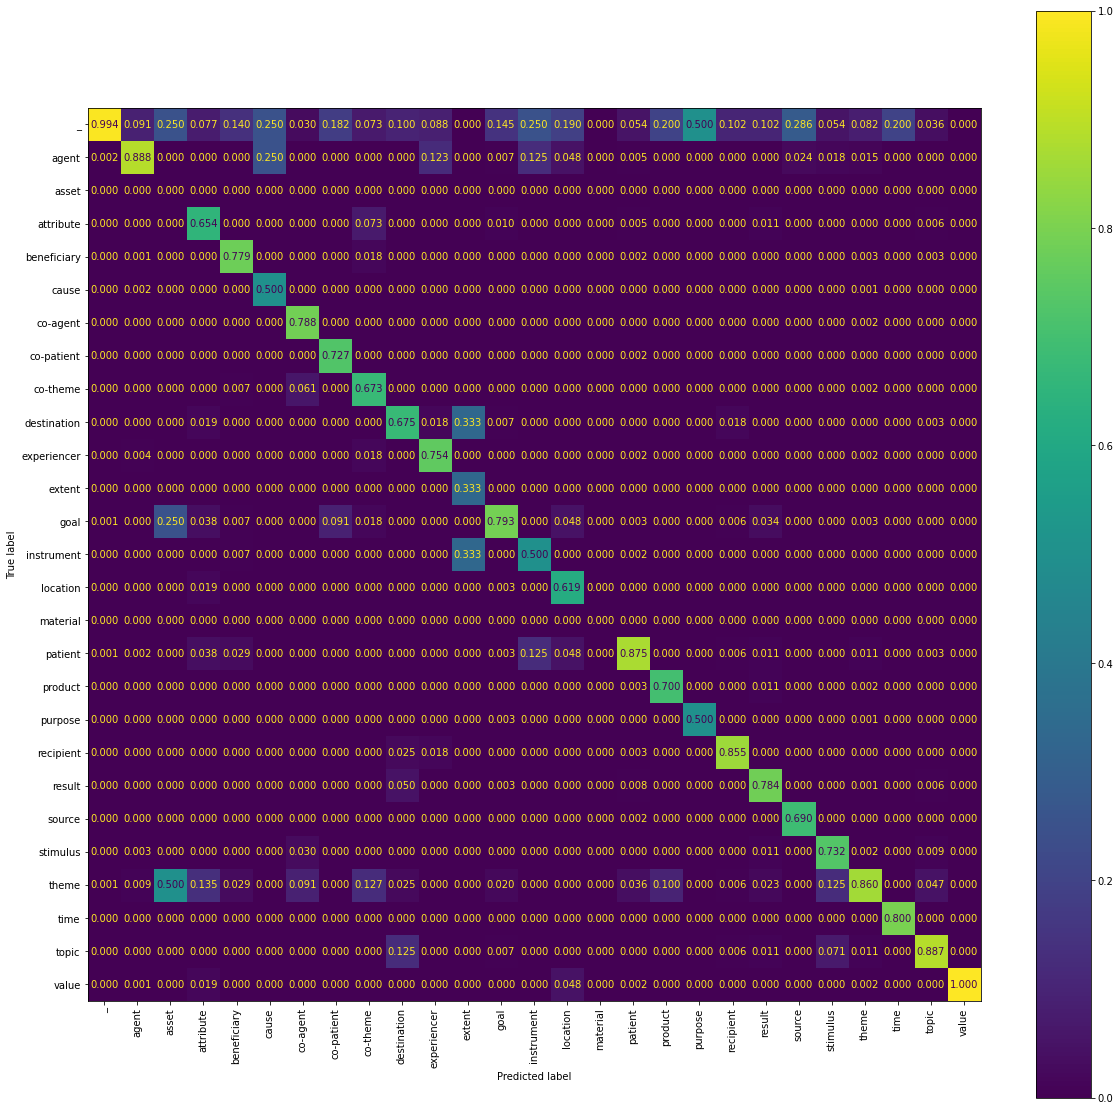

In [ ]:
y_pred = plain_predictions
y_true = plain_labels
gif, ax = plt.subplots(figsize=(20,20))
ConfusionMatrixDisplay.from_predictions(y_true=y_true, y_pred=y_pred, 
                                        xticks_rotation='vertical', ax=ax, 
                                        normalize='pred',
                                        values_format=".3f")
plt.savefig("cf.svg")


### EXPORT OBJECTS

In [ ]:
DIR_OUTPUT_LOCAL = DIR_FINAL_MODEL

In [ ]:
FILE_OUT_SRL_MAP = os.path.join(DIR_OUTPUT_LOCAL, "srl_map.pickle")
save_object(FILE_OUT_SRL_MAP, SRL_MAP)

In [ ]:
FILE_OUT_PRED_SENSE_MAP = os.path.join(DIR_OUTPUT_LOCAL, "pred_sense_map.pickle")
save_object(FILE_OUT_PRED_SENSE_MAP, PRED_SENSE_MAP)

In [ ]:
FILE_OUT_HPARAMS = os.path.join(DIR_OUTPUT_LOCAL, 'hparams.pickle')
save_object(FILE_OUT_HPARAMS, HPARAMS)

In [ ]:
FILE_OUT_GLOBAL_SETTING = os.path.join(DIR_OUTPUT_LOCAL, 'global_setting.pickle')
save_object(FILE_OUT_GLOBAL_SETTING, GLOBAL_SETTING)

In [ ]:
FILE_OUT_TOKENIZER = os.path.join(DIR_OUTPUT_LOCAL, 'tokenizer.pickle')
save_object(FILE_OUT_TOKENIZER, TOKENIZER)

In [ ]:
FILE_OUT_POS_TAG_MAP = os.path.join(DIR_OUTPUT_LOCAL, 'pos_tag_map.pickle')
save_object(FILE_OUT_POS_TAG_MAP, POS_TAG_MAP)

In [ ]:
FILE_OUT_POS_TAGGER = os.path.join(DIR_OUTPUT_LOCAL, 'pos_tagger.pickle')
save_object(FILE_OUT_POS_TAGGER, POS_TAGGER)

In [ ]:
stop here

# UNMOUNT

In [ ]:
stop here

In [ ]:
drive.flush_and_unmount() # flush to disk pending data 